# plt_colors


## TO-DO 
1. en show_plt_palettes que me permita ingresar la/las paleta como argumento
- por qué quiero hacer esto?:
    1. Para ver si ciertas paletas existen de modo de:
    2. Determinar todas las paletas secuenciales para:
    3. Que en el pie chart las NO secuenciales NO eliminen los extremos
- igual, YA VEREMOS, porque por ahí lo que conviene es UNICAMENTE eliminar los extremos si la palette NO ES Qualitative
1. También el show palettes que me muestre las listas escritas listas COMPLETAS (no solo las que se muestran)

## OJO !, 
- en todo lo que graique fig!1, debo evaluar hacer el ax_plt_xxx independiente por si quiero pedar todos mis 
- distinto ax en una misma fig de varios subplots (igual debería investigar más el subfigures!!!)

In [1]:
# Standard Libs
from typing import Optional, Union
import random
import textwrap

# Third-Party Libs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colormaps
# from colorspacious import cspace_converter
import matplotlib as mpl

# Local Libs
from jm_utils.data import plt_functions as plt_func
from jm_utils.data.plt_functions import to_series

plt_func.__version__

'0.1.0'

In [2]:
# dir(plt_func)
# fig = plt_func.show_plt_palettes('Cyclic')

In [3]:

all_palettes = list(colormaps)
dir(colormaps)
print(textwrap.fill(", ".join(colormaps()), width=120))
print(len(colormaps()))

# print(textwrap.fill(", ".join(all_palettes), width=120))

magma, inferno, plasma, viridis, cividis, twilight, twilight_shifted, turbo, berlin, managua, vanimo, Blues, BrBG, BuGn,
BuPu, CMRmap, GnBu, Greens, Greys, OrRd, Oranges, PRGn, PiYG, PuBu, PuBuGn, PuOr, PuRd, Purples, RdBu, RdGy, RdPu,
RdYlBu, RdYlGn, Reds, Spectral, Wistia, YlGn, YlGnBu, YlOrBr, YlOrRd, afmhot, autumn, binary, bone, brg, bwr, cool,
coolwarm, copper, cubehelix, flag, gist_earth, gist_gray, gist_heat, gist_ncar, gist_rainbow, gist_stern, gist_yarg,
gnuplot, gnuplot2, gray, hot, hsv, jet, nipy_spectral, ocean, pink, prism, rainbow, seismic, spring, summer, terrain,
winter, Accent, Dark2, Paired, Pastel1, Pastel2, Set1, Set2, Set3, tab10, tab20, tab20b, tab20c, grey, gist_grey,
gist_yerg, Grays, magma_r, inferno_r, plasma_r, viridis_r, cividis_r, twilight_r, twilight_shifted_r, turbo_r, berlin_r,
managua_r, vanimo_r, Blues_r, BrBG_r, BuGn_r, BuPu_r, CMRmap_r, GnBu_r, Greens_r, Greys_r, OrRd_r, Oranges_r, PRGn_r,
PiYG_r, PuBu_r, PuBuGn_r, PuOr_r, PuRd_r, Purples_r, RdBu_r,

In [4]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

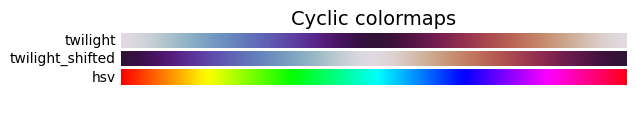

In [5]:
plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])

In [6]:
Seq_full = ['afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'Blues', 'Blues_r', 
            'bone', 'bone_r', 'brg', 'brg_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r',
            'cividis', 'cividis_r', 'cool', 'cool_r', 'copper', 'copper_r', 'gist_gray', 'gist_gray_r',
            'gist_heat', 'gist_heat_r', 'gist_yarg', 'gist_yarg_r', 'GnBu', 'GnBu_r', 'gnuplot', 'gnuplot_r',
            'gray', 'gray_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'hot', 'hot_r',
            'inferno', 'inferno_r', 'magma', 'magma_r', 'ocean', 'ocean_r', 'Oranges', 'Oranges_r',
            'OrRd', 'OrRd_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'PuBu', 'PuBu_r',
            'PuBuGn', 'PuBuGn_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdPu', 'RdPu_r',
            'Reds', 'Reds_r', 'spring', 'spring_r', 'summer', 'summer_r', 'terrain', 'terrain_r',
            'viridis', 'viridis_r', 'winter', 'winter_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGn_r',
            'YlGnBu', 'YlGnBu_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r']

perceptually_uniform = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
single_hue = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
              'binary', 'gray', 'gist_gray', 'gist_yarg', 'bone', 'pink']
multi_hue = ['YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu',
             'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
miscellaneous = ['autumn', 'spring', 'summer', 'winter', 'cool', 'hot', 'afmhot', 'copper',
                 'gist_heat', 'Wistia', 'terrain', 'ocean', 'brg', 'gnuplot']
mis = ['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
       'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral', 'gist_ncar']

def add_reversed(names):
    return [name for n in names for name in (n, n + '_r')]

Seq_groups = {
    "Perceptually Uniform": [c for c in Seq_full if c in add_reversed(perceptually_uniform)],
    "Single-Hue": [c for c in Seq_full if c in add_reversed(single_hue)],
    "Multi-Hue": [c for c in Seq_full if c in add_reversed(multi_hue)],
    "Miscellaneous": [c for c in Seq_full if c in add_reversed(miscellaneous)],
}

# for group, items in Seq_groups.items():
#     print(f"\n# {group} ({len(items)}):")
#     print("   " + ", ".join(items))

Seq_uniform = ['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
       'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral', 'gist_ncar']
Seq_uniform = sorted(Seq_uniform, key=lambda s: s.lower())
su_with_r = [pltt + '_r' for pltt in Seq_uniform]
Seq_uniform = sorted(Seq_uniform + su_with_r, key=lambda s: s.lower())

for i, pltt in enumerate(Seq_uniform):
    print(f"'{pltt}',", end=" ")
    if (i + 1) % 8 == 0:
        print()

Seq_uniform = ['cividis', 'cividis_r', 'inferno', 'inferno_r', 'magma', 'magma_r', 'plasma', 'plasma_r',
               'viridis', 'viridis_r']

Seq_single_hue = ['binary', 'binary_r', 'Blues', 'Blues_r', 'bone', 'bone_r', 'gist_gray', 'gist_gray_r',
               'gist_yarg', 'gist_yarg_r', 'gray', 'gray_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r',
               'Oranges', 'Oranges_r', 'pink', 'pink_r', 'Purples', 'Purples_r', 'Reds', 'Reds_r',]

Seq_multi_hue = ['BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'GnBu', 'GnBu_r', 'OrRd', 'OrRd_r',
                 'PuBu', 'PuBu_r', 'PuBuGn', 'PuBuGn_r', 'PuRd', 'PuRd_r', 'RdPu', 'RdPu_r',
                 'YlGn', 'YlGn_r', 'YlGnBu', 'YlGnBu_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r',]

Seq_general = ['afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'brg', 'brg_r', 'cool', 'cool_r',
               'copper', 'copper_r', 'gist_heat', 'gist_heat_r', 'gnuplot', 'gnuplot_r', 'hot', 'hot_r',
               'ocean', 'ocean_r', 'spring', 'spring_r', 'summer', 'summer_r', 'terrain', 'terrain_r',
               'winter', 'winter_r', 'Wistia', 'Wistia_r',]

mis = ['brg', 'brg_r', 'CMRmap', 'CMRmap_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',
       'gist_earth', 'gist_earth_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r',
       'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'jet', 'jet_r', 'nipy_spectral', 'nipy_spectral_r',
       'ocean', 'ocean_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'terrain', 'terrain_r',
       'turbo', 'turbo_r']

print(len(Seq_uniform) + len(Seq_single_hue) + len(Seq_multi_hue) + len(Seq_general))

# print(textwrap.fill(", ".join(Seq_uniform), width=120))
# print(len(Seq_uniform))

'brg', 'brg_r', 'CMRmap', 'CMRmap_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 
'gist_earth', 'gist_earth_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'jet', 'jet_r', 'nipy_spectral', 'nipy_spectral_r', 
'ocean', 'ocean_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'terrain', 'terrain_r', 
'turbo', 'turbo_r', 86


In [7]:
# Sequential full
more = ['spring', 'summer', 'winter', 'hot', 'afmhot', 'copper', 'gist_heat', 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink']
seq1 = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd',
        'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
seq2 = ['autumn', 'binary', 'Blues', 'brg', 'BuPu', 'cividis', 'cool', 'GnBu', 'Greens', 'Greys', 'gnuplot', 'inferno', 'magma',
        'ocean', 'Oranges', 'OrRd', 'plasma', 'PuRd', 'Purples', 'Reds', 'terrain', 'viridis', 'Wistia']

sum_sorted = sorted(set(more + seq1 + seq2), key = lambda s: s.lower())

with_r = [pltt + "_r" for pltt in sum_sorted]

full_lst = sorted(set(sum_sorted + with_r), key = lambda s: s.lower())

print(f"{len(sum_sorted) = }, {len(with_r) = }, {len(full_lst) =}")

for i, pltt in enumerate(full_lst):
    print(f"'{pltt}',", end=" ")
    if (i + 1) % 8 == 0:
        print()


# fmt_ss = textwrap.fill(", ".join(full_lst), width=120)
# print(fmt_ss)

sequential = ['afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'Blues', 'Blues_r', 
              'bone', 'bone_r', 'brg', 'brg_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r',
              'cividis', 'cividis_r', 'cool', 'cool_r', 'copper', 'copper_r', 'gist_gray', 'gist_gray_r',
              'gist_heat', 'gist_heat_r', 'gist_yarg', 'gist_yarg_r', 'GnBu', 'GnBu_r', 'gnuplot', 'gnuplot_r',
              'gray', 'gray_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'hot', 'hot_r',
              'inferno', 'inferno_r', 'magma', 'magma_r', 'ocean', 'ocean_r', 'Oranges', 'Oranges_r',
              'OrRd', 'OrRd_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'PuBu', 'PuBu_r',
              'PuBuGn', 'PuBuGn_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdPu', 'RdPu_r',
              'Reds', 'Reds_r', 'spring', 'spring_r', 'summer', 'summer_r', 'terrain', 'terrain_r',
              'viridis', 'viridis_r', 'winter', 'winter_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGn_r',
              'YlGnBu', 'YlGnBu_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r']

len(sum_sorted) = 43, len(with_r) = 43, len(full_lst) =86
'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'Blues', 'Blues_r', 
'bone', 'bone_r', 'brg', 'brg_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
'cividis', 'cividis_r', 'cool', 'cool_r', 'copper', 'copper_r', 'gist_gray', 'gist_gray_r', 
'gist_heat', 'gist_heat_r', 'gist_yarg', 'gist_yarg_r', 'GnBu', 'GnBu_r', 'gnuplot', 'gnuplot_r', 
'gray', 'gray_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'hot', 'hot_r', 
'inferno', 'inferno_r', 'magma', 'magma_r', 'ocean', 'ocean_r', 'Oranges', 'Oranges_r', 
'OrRd', 'OrRd_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'PuBu', 'PuBu_r', 
'PuBuGn', 'PuBuGn_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdPu', 'RdPu_r', 
'Reds', 'Reds_r', 'spring', 'spring_r', 'summer', 'summer_r', 'terrain', 'terrain_r', 
'viridis', 'viridis_r', 'winter', 'winter_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGn_r', 
'YlGnBu', 'YlGnBu_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 

## Show Palettes - Modificaciones
1. Que permita el ingreso de la o las paletas que se quieren ver - YA ESTANA je!!
    - Si ingresas una lista en vez de un string!!!
2. Que imprima las lista de nombres completas 

In [26]:
def get_color_list(palette: str, n_colors: Optional[int] = 10) -> list[str]:
    """
    Returns a list of hex color codes from a specified Matplotlib colormap or a named palette.

    This function generates a list of colors suitable for data visualization. It supports
    custom Matplotlib colormaps and a predefined 'colorblind' palette optimized for
    accessibility.

    Parameters:
        palette (str): Name of the colormap or palette to use. Special value:
            - 'colorblind': Returns a predefined colorblind-safe palette.
            - Any other string: Interpreted as a Matplotlib colormap (e.g., 'viridis', 'plasma').

        n_colors (int, optional): Number of colors to generate from the colormap.
            Ignored if palette is 'colorblind' (which returns a fixed set).
            Default is 10.

    Returns:
        list[str]: A list of hexadecimal color codes (e.g., '#0173B2').

    Raises:
        ValueError: If the specified Matplotlib colormap does not exist.
        TypeError: If `n_colors` is not a number.

    Notes:
        - For the 'colorblind' palette, the function returns a fixed set of 30 colors.
          If more than 30 are requested, they will be truncated.
        - Uses `matplotlib.pyplot.get_cmap` and `matplotlib.colors.rgb2hex` internally.
        - Ideal for use in custom plotting functions requiring consistent, accessible color schemes.

    Example:
        >>> get_color_list('viridis', 3)
        ['#440154', '#21908C', '#FDE725']

        >>> get_color_list('colorblind', 5)
        ['#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC']
    """
    if palette == 'colorblind':
        return [
            '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC',
            '#CA9161', '#FBAFE4', '#949494', '#ECE133', '#56B4E9',
            '#5D8C3B', '#A93967', '#888888', '#FFC107', '#7C9680',
            '#E377C2', '#BCBD22', '#AEC7E8', '#FFBB78', '#98DF8A',
            '#FF9896', '#C5B0D5', '#C49C94', '#F7B6D2', '#DBDB8D',
            '#9EDAE5', '#D68E3A', '#A65898', '#B2707D', '#8E6C87'
        ]
    else:
        cmap = plt.get_cmap(palette)                        # Get the colormap
        colors_normalized = np.linspace(0, 1, n_colors)     # Generate equidistant points between 0 and 1
        colors_rgba = cmap(colors_normalized)               # Get the colors from colormap
        return [mcolors.rgb2hex(color[:3]) for color in colors_rgba]
    

def get_matplotlib_palettes_dict():
    matplotlib_palettes = {
        "Cyclic": ([
            "hsv", "hsv_r", "twilight", "twilight_r", "twilight_shifted", "twilight_shifted_r"
        ], 'For values that wrap around at the endpoints, such as phase angle, wind direction, or time of day.'),
        
        "Diverging": ([
            "BrBG", "BrBG_r", "bwr", "bwr_r", "coolwarm", "coolwarm_r", "PiYG", "PiYG_r",
            "PRGn", "PRGn_r", "PuOr", "PuOr_r", "RdBu", "RdBu_r", "RdGy", "RdGy_r",
            "RdYlBu", "RdYlBu_r", "RdYlGn", "RdYlGn_r", "seismic", "seismic_r", "Spectral", "Spectral_r"
        ], 'When the information being plotted has a critical middle value, such as topography or when the data deviates around zero.'),
        
        "Miscellaneous": ([
            "brg", "brg_r", 'CMRmap', 'CMRmap_r', 'cubehelix', 'cubehelix_r', "flag", "flag_r",
            'gist_earth', 'gist_earth_r', "gist_ncar", "gist_ncar_r", "gist_rainbow", "gist_rainbow_r", "gist_stern", "gist_stern_r",
            "gnuplot", "gnuplot_r", "gnuplot2", "gnuplot2_r", "jet", "jet_r", "nipy_spectral", "nipy_spectral_r",
            'ocean', 'ocean_r', "prism", "prism_r", 'terrain', 'terrain_r', 'turbo', 'turbo_r',
            "rainbow", "rainbow_r"
        ], 'Particular uses for which they have been created. E.G gist_earth, ocean, and terrain for plotting topography'),
        
        "Perceptually Uniform Sequential": ([
            "cividis", "cividis_r", "inferno", "inferno_r", "magma", "magma_r", "plasma", "plasma_r",
            "viridis", "viridis_r"
        ], 'For representing information that has ordering.'),
        
        "Single-Hue Sequential": ([
            "binary", "binary_r", "Blues", "Blues_r", "bone", "bone_r", "gist_gray", "gist_gray_r",
            "gist_yarg", "gist_yarg_r", "gray", "gray_r", "Grays", "Grays_r", "Greens", "Greens_r",
            "grey", "grey_r", "Greys", "Greys_r", "Oranges", "Oranges_r", "Purples", "Purples_r",
            "Reds", "Reds_r"
        ], 'For representing information that has ordering.'),
        
        "Multi-Hue Sequential": ([
            "autumn", "autumn_r", "BuGn", "BuGn_r", "BuPu", "BuPu_r", "cool", "cool_r",
            "GnBu", "GnBu_r", "OrRd", "OrRd_r", "PuBu", "PuBu_r", "PuBuGn", "PuBuGn_r",
            "PuRd", "PuRd_r", "spring", "spring_r", "summer", "summer_r", "winter", "winter_r",
            "YlGn", "YlGn_r", "YlGnBu", "YlGnBu_r", "YlOrBr", "YlOrBr_r", "YlOrRd", "YlOrRd_r"
        ], 'For representing information that has ordering.'),
        
        "Other Sequential": ([
            "afmhot", "afmhot_r", "berlin", "berlin_r", "CMRmap", "CMRmap_r", "copper", "copper_r",
            "crest", "crest_r", "cubehelix", "cubehelix_r", "flare", "flare_r", "gist_earth", "gist_earth_r",
            "gist_grey", "gist_grey_r", "gist_heat", "gist_heat_r", "gist_yarg", "gist_yarg_r", "gist_yerg",
            "gist_yerg_r", "hot", "hot_r", "icefire", "icefire_r", "mako", "mako_r", "managua", "managua_r",
            "ocean", "ocean_r", "pink", "pink_r", "rocket", "rocket_r", "terrain", "terrain_r",
            "vanimo", "vanimo_r", "vlag", "vlag_r", "Wistia", "Wistia_r"
        ], 'For representing information that has ordering.'),
        
        "Qualitative": ([
            "Accent", "Accent_r", 'colorblind', "Dark2", "Dark2_r", "Paired", "Paired_r", "Pastel1",
            "Pastel1_r", "Pastel2", "Pastel2_r", "Set1", "Set1_r", "Set2", "Set2_r", "Set3",
            "Set3_r", "tab10", "tab10_r", "tab20", "tab20_r", "tab20b", "tab20b_r", "tab20c",
            "tab20c_r"
        ], 'To represent information which does not have ordering or relationships. Also for categorical data')
    }

    return matplotlib_palettes


def show_plt_palettes(
        palette_group: Union[str, list[str]] = 'Sample',
        n_colors: Optional[int] = 14,
        discrete: Optional[bool] = True
) -> plt.Figure:
    
    # First verified n_colors parameter (cause validation and preprocess palette_group parameter need more data)
    if not isinstance(n_colors, (int, float)):
        raise TypeError(f"'n_items' parameter not valid. Must be an int or float. Got '{type(n_colors)}'.")

    if n_colors < 1 or n_colors > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{n_colors}'.")
    n_colors = int(n_colors)
    
    # Get the known matplotlib palettes in a dict by categories and a list of the lists of palettes (This list of lists to build the sample list)
    palettes_by_category_dic = get_matplotlib_palettes_dict()
## Este DICT lo tengo que aumentar con las key 'Sample' y 'Custom' PERO posiblemente tengo que adicionar primero sample y en una segundo paso 'Custom' porque
# Custom NO existe hasta que hago un preprocess del parámetro palettes_group.

    list_of_pltt_lists = [value[0] for value in palettes_by_category_dic.values()]

    # Aux. dict to add 'Custom' and 'Sample' keys to the palettes_by_category_dic
    aux_dic = {
        'Custom': ([], 'User selected palettes'),       # User Custom palette list born empty. It will take the value entered by the user if the user enters a list as palette_group parameter    
        'Sample': ([pltt for p_g in list_of_pltt_lists for pltt in random.sample(p_g, k=2)],                                # A random sample of two of e/category
                   "2 Cyclic, 2 Diverging, 2 Miscellaneous, 2 Perceptually Uniform Sequential, 2 Single-Hue Sequential,"
                   "2 Multi-Hue Sequential, 2 Other Sequential, 2 Qualitative.")
    }

    palettes_by_category_dic.update(aux_dic)            # dict_keys(['Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Single-Hue Sequential', 'Multi-Hue Sequential', 'Special Sequential', 'Qualitative', 'Custom', 'Sample'])

    # Internal auxiliary function that generates a figure containing the names of the palettes according to their type.
    def _show_dic(dic):
        all_text =""
        for group_name, (palette_list, description) in dic.items():
            all_text += f"# {group_name} - {description}:\n"
            wrapped = textwrap.fill(", ".join(palette_list), width=140, initial_indent="    ", subsequent_indent="    ")
            all_text += wrapped + "\n\n"
        # Build de Figure showing all text
        fig, ax = plt.subplots(figsize=(8, len(all_text.splitlines()) * 0.2), tight_layout=True)
        ax.set_axis_off()                          # Hide x and y axis
        ax.text(0.025, 0.5, all_text, fontsize=10, va="center", ha="left", family="monospace")
        plt.show()
        return fig            
    
    # Validate and preprocess palette_group parameter: get the palette_group_key, print lists/names if selected, or fill custom list
    if isinstance(palette_group, str):          
        palette_group_key = palette_group.strip().title()
        if palette_group_key == 'Names':
            fig = _show_dic(palettes_by_category_dic)
            return fig
        elif palette_group_key not in palettes_by_category_dic.keys():
            raise ValueError(f"Invalid value for 'palette_group': {repr(palette_group)}. Expected one of:"
                             "'Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Single-Hue Sequential'," 
                             "'Multi-Hue Sequential', 'Other Sequential', 'Qualitative', 'Custom', 'Sample'.")   
    elif isinstance(palette_group, list):
        palette_group_key = 'Custom'
        Custom = palette_group                  # The list of entered palettes is also assigned to the Custom variable
    else:
        raise TypeError(f"Invalid type for 'palette_group': {repr(palette_group)}. Expected one of: 'str' or 'list'.")

    # Verified n_colors parameter
    if not isinstance(n_colors, (int, float)):
        raise TypeError(f"'n_items' parameter not valid. Must be an int or float. Got '{type(n_colors)}'.")

    if n_colors < 1 or n_colors > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{n_colors}'.")
    n_colors = int(n_colors) + 1

    # Get the selected_group and selected_group_desc (description), the ones tha will be displayed                           
    # selected_group, selected_group_desc = palettes_by_category_dic[palette_group_key]
    palette_group_list, palette_group_desc = palettes_by_category_dic[palette_group_key]

    # # Build a Series of n_items elements to show colors
    # sr = to_series({str(i): 1 for i in range(1, n_colors)})

    # # Create a figure with two columns for the palettes - Bar charts showing palette colors
    # rows = len(palette_group_list) // 2 if len(palette_group_list) % 2 == 0 else (len(palette_group_list) // 2) + 1
    # width = 12                                              # Fixed width at 12 for now (can we look into making it proportional to n_colors?)
    # height = rows / 1.25 if rows > 6 else rows / 1.05       # To avoid overlapping axes when there are few rows
    
    # fig, axs = plt.subplots(rows, 2, figsize=(width, height), tight_layout=True, sharex=True)

    # # Set the figure title and subtitle with the palette group key and description
    # fig.suptitle(f"* Matplolib {palette_group_key} colormaps (palettes) - {len(palette_group_list)} *\n{palette_group_list}",
    #              fontsize=12, fontweight='medium')

    if discrete:
        # Build a Series of n_items elements to show colors
        sr = to_series({str(i): 1 for i in range(1, n_colors)})

        # Create a figure with two columns for the palettes - Bar charts showing palette colors
        rows = len(palette_group_list) // 2 if len(palette_group_list) % 2 == 0 else (len(palette_group_list) // 2) + 1
        width = 12                                              # Fixed width at 12 for now (can we look into making it proportional to n_colors?)
        height = rows / 1.25 if rows > 6 else rows / 1.05       # To avoid overlapping axes when there are few rows
        
        fig, axs = plt.subplots(rows, 2, figsize=(width, height), tight_layout=True, sharex=True)

        # Set the figure title and subtitle with the palette group key and description
        fig.suptitle(f"* Matplolib {palette_group_key} colormaps (palettes) - {len(palette_group_list)} *\n{palette_group_list}",
                    fontsize=12, fontweight='medium')

        # Iterate over the axes and palette group to plot each palette                                           
        for ax, pltt in zip(axs.flatten(), palette_group_list):
            try:
                color_list = get_color_list(pltt, n_colors)
                ax.bar(sr.index, sr, color=color_list, width=1, edgecolor='white', linewidth=0.2)
                ax.set_xlim(-0.5, n_colors - 1.5)
                ax.set_ylim(0, 0.1)
                ax.set_title(pltt, loc='left', fontsize=10, fontweight='medium')
            except ValueError:
                err_msg = f"'{pltt}' is not currently a valid Matplotlib palette (cmap)"
                ax.set_title(err_msg, loc='left', fontsize=10, fontweight='medium', color='red')

            ax.set_yticks([])       # Hide y-ticks for cleaner look
            ax.set_xticks([])       # Hide x-ticks
    else:
        # cmaps = {}
        # if palette_group_key == 'Qualitative' or palette_group_key == 'Sample':
        #     palette_group_list.remove('colorblind')
        try:    # Remove 'colorblind' if exist in the selected list (Qualitative or Sample)
            palette_group_list.remove('colorblind')
        except ValueError:
            pass

        gradient = np.linspace(0, 1, 256)
        gradient = np.vstack((gradient, gradient))

        # Create figure and adjust figure height to number of colormaps
        # nrows = len(cmap_list)
        nrows = len(palette_group_list)
        figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
        fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
        fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                            left=0.2, right=0.99)
        axs[0].set_title(f'{palette_group_key} colormaps', fontsize=14)

        for ax, name in zip(axs, palette_group_list):
            ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
            ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                    transform=ax.transAxes)

        # Turn off *all* ticks & spines, not just the ones with colormaps.
        for ax in axs:
            ax.set_axis_off()

        # Save colormap list for later.
        # cmaps[category] = cmap_list

    plt.show()
    return fig                  # Return the current figure for further manipulation if needed

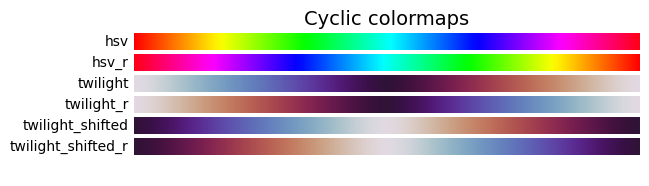

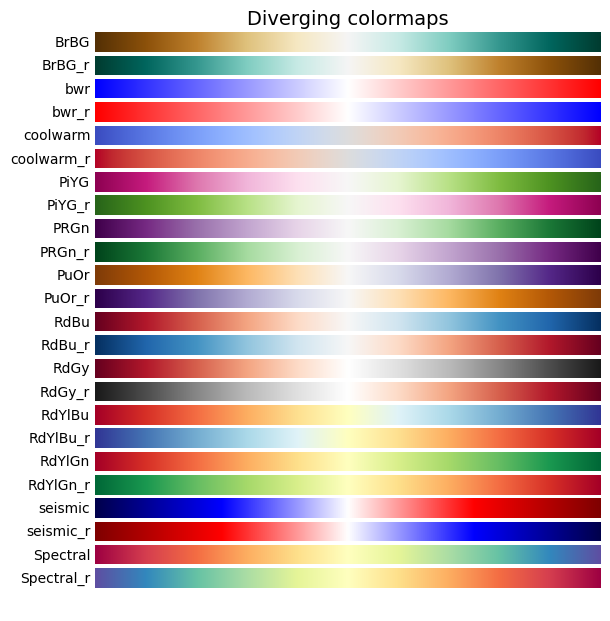

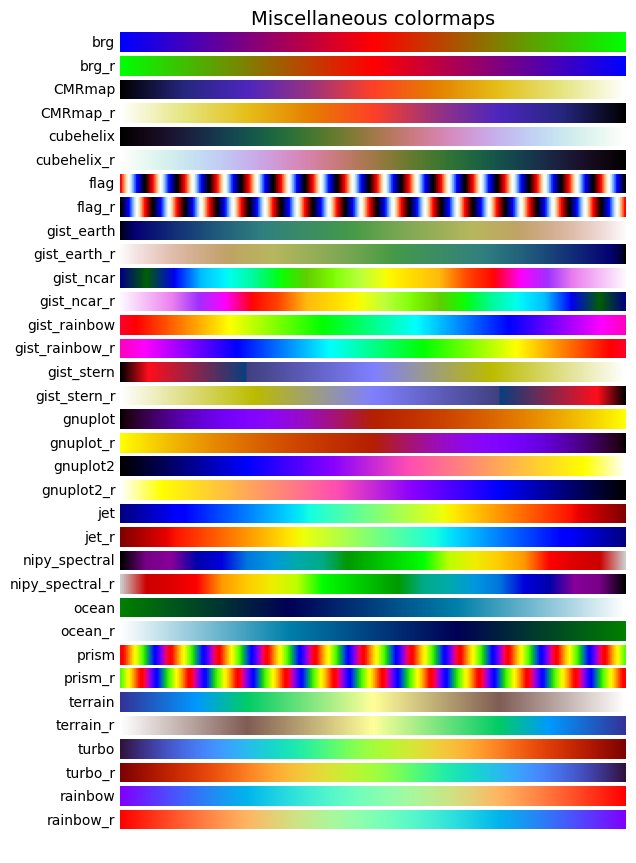

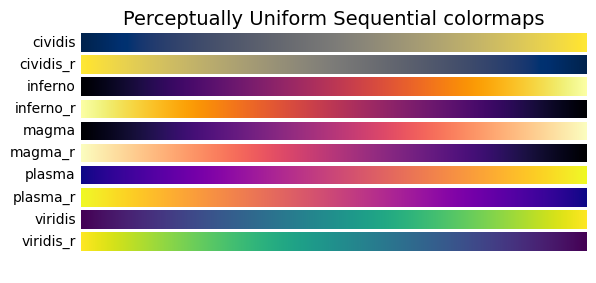

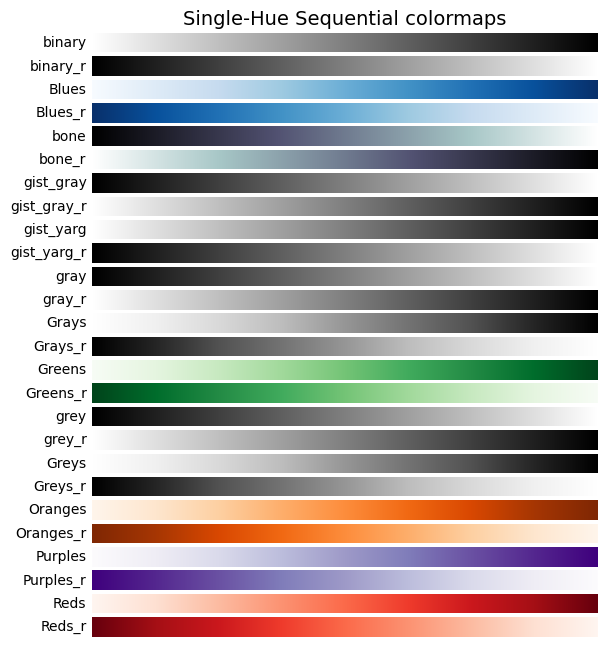

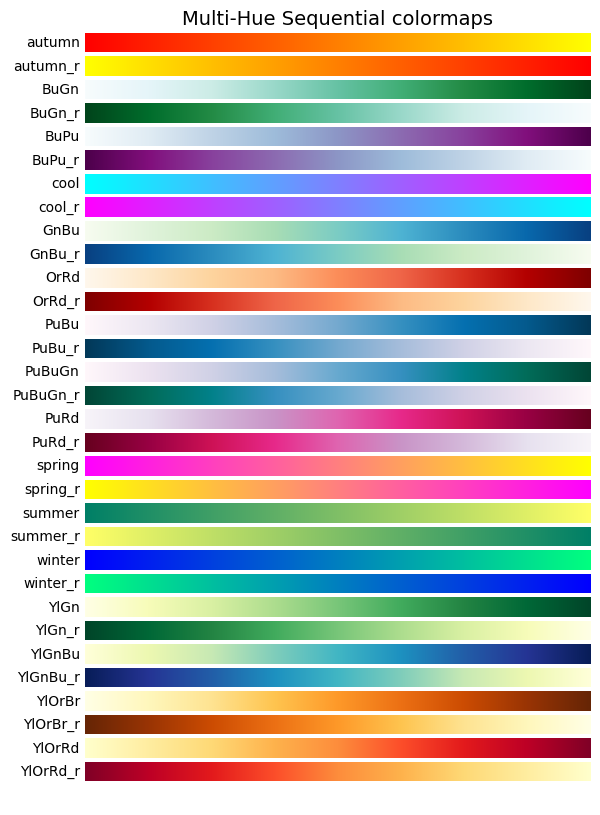

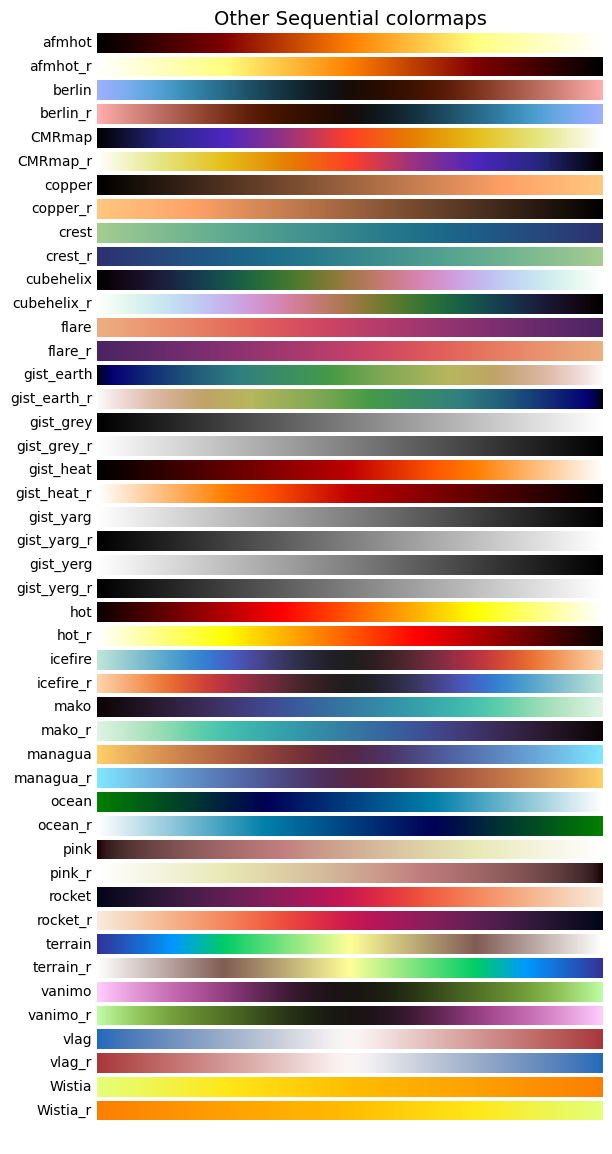

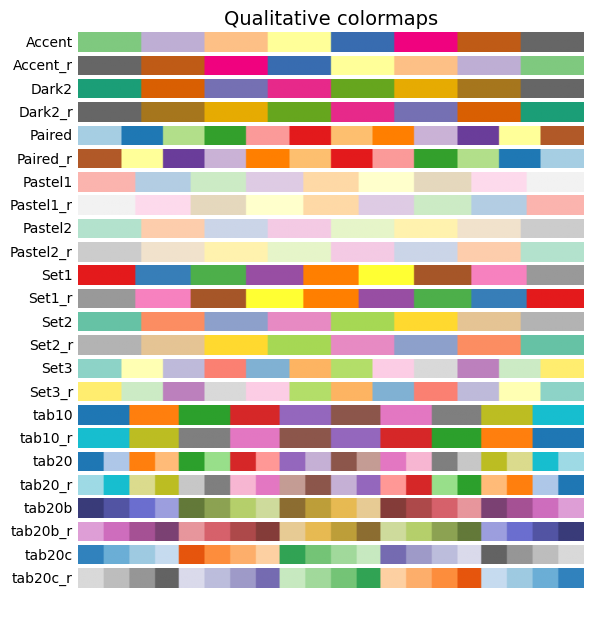

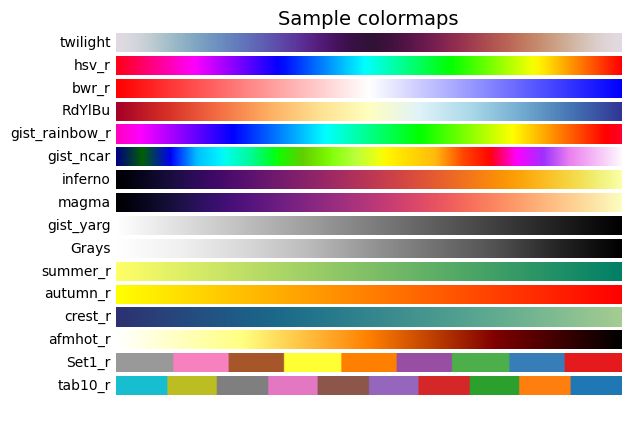

In [27]:
for pltt in ['Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Single-Hue Sequential',
             'Multi-Hue Sequential', 'Other Sequential', 'Qualitative', 'Sample']:
    fig = show_plt_palettes(pltt, discrete=False)

# fig = show_plt_palettes('Qualitative', discrete=False)

In [10]:
def get_color_list(palette: str, n_colors: Optional[int] = 10) -> list[str]:
    """
    Returns a list of hex color codes from a specified Matplotlib colormap or a named palette.

    This function generates a list of colors suitable for data visualization. It supports
    custom Matplotlib colormaps and a predefined 'colorblind' palette optimized for
    accessibility.

    Parameters:
        palette (str): Name of the colormap or palette to use. Special value:
            - 'colorblind': Returns a predefined colorblind-safe palette.
            - Any other string: Interpreted as a Matplotlib colormap (e.g., 'viridis', 'plasma').

        n_colors (int, optional): Number of colors to generate from the colormap.
            Ignored if palette is 'colorblind' (which returns a fixed set).
            Default is 10.

    Returns:
        list[str]: A list of hexadecimal color codes (e.g., '#0173B2').

    Raises:
        ValueError: If the specified Matplotlib colormap does not exist.
        TypeError: If `n_colors` is not a number.

    Notes:
        - For the 'colorblind' palette, the function returns a fixed set of 30 colors.
          If more than 30 are requested, they will be truncated.
        - Uses `matplotlib.pyplot.get_cmap` and `matplotlib.colors.rgb2hex` internally.
        - Ideal for use in custom plotting functions requiring consistent, accessible color schemes.

    Example:
        >>> get_color_list('viridis', 3)
        ['#440154', '#21908C', '#FDE725']

        >>> get_color_list('colorblind', 5)
        ['#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC']
    """
    if palette == 'colorblind':
        return [
            '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC',
            '#CA9161', '#FBAFE4', '#949494', '#ECE133', '#56B4E9',
            '#5D8C3B', '#A93967', '#888888', '#FFC107', '#7C9680',
            '#E377C2', '#BCBD22', '#AEC7E8', '#FFBB78', '#98DF8A',
            '#FF9896', '#C5B0D5', '#C49C94', '#F7B6D2', '#DBDB8D',
            '#9EDAE5', '#D68E3A', '#A65898', '#B2707D', '#8E6C87'
        ]
    else:
        cmap = plt.get_cmap(palette)                        # Get the colormap
        colors_normalized = np.linspace(0, 1, n_colors)     # Generate equidistant points between 0 and 1
        colors_rgba = cmap(colors_normalized)               # Get the colors from colormap
        return [mcolors.rgb2hex(color[:3]) for color in colors_rgba]
    

def get_matplotlib_palettes_dict():
    matplotlib_palettes = {
        "Cyclic": ([
            "hsv", "hsv_r", "twilight", "twilight_r", "twilight_shifted", "twilight_shifted_r"
        ], 'For values that wrap around at the endpoints, such as phase angle, wind direction, or time of day.'),
        
        "Diverging": ([
            "BrBG", "BrBG_r", "bwr", "bwr_r", "coolwarm", "coolwarm_r", "PiYG", "PiYG_r",
            "PRGn", "PRGn_r", "PuOr", "PuOr_r", "RdBu", "RdBu_r", "RdGy", "RdGy_r",
            "RdYlBu", "RdYlBu_r", "RdYlGn", "RdYlGn_r", "seismic", "seismic_r", "Spectral", "Spectral_r"
        ], 'When the information being plotted has a critical middle value, such as topography or when the data deviates around zero.'),
        
        "Miscellaneous": ([
            "brg", "brg_r", 'CMRmap', 'CMRmap_r', 'cubehelix', 'cubehelix_r', "flag", "flag_r",
            'gist_earth', 'gist_earth_r', "gist_ncar", "gist_ncar_r", "gist_rainbow", "gist_rainbow_r", "gist_stern", "gist_stern_r",
            "gnuplot", "gnuplot_r", "gnuplot2", "gnuplot2_r", "jet", "jet_r", "nipy_spectral", "nipy_spectral_r",
            'ocean', 'ocean_r', "prism", "prism_r", 'terrain', 'terrain_r', 'turbo', 'turbo_r',
            "rainbow", "rainbow_r"
        ], 'Particular uses for which they have been created. E.G gist_earth, ocean, and terrain for plotting topography'),
        
        "Perceptually Uniform Sequential": ([
            "cividis", "cividis_r", "inferno", "inferno_r", "magma", "magma_r", "plasma", "plasma_r",
            "viridis", "viridis_r"
        ], 'For representing information that has ordering.'),
        
        "Single-Hue Sequential": ([
            "binary", "binary_r", "Blues", "Blues_r", "bone", "bone_r", "gist_gray", "gist_gray_r",
            "gist_yarg", "gist_yarg_r", "gray", "gray_r", "Grays", "Grays_r", "Greens", "Greens_r",
            "grey", "grey_r", "Greys", "Greys_r", "Oranges", "Oranges_r", "Purples", "Purples_r",
            "Reds", "Reds_r"
        ], 'For representing information that has ordering.'),
        
        "Multi-Hue Sequential": ([
            "autumn", "autumn_r", "BuGn", "BuGn_r", "BuPu", "BuPu_r", "cool", "cool_r",
            "GnBu", "GnBu_r", "OrRd", "OrRd_r", "PuBu", "PuBu_r", "PuBuGn", "PuBuGn_r",
            "PuRd", "PuRd_r", "spring", "spring_r", "summer", "summer_r", "winter", "winter_r",
            "YlGn", "YlGn_r", "YlGnBu", "YlGnBu_r", "YlOrBr", "YlOrBr_r", "YlOrRd", "YlOrRd_r"
        ], 'For representing information that has ordering.'),
        
        "Other Sequential": ([
            "afmhot", "afmhot_r", "berlin", "berlin_r", "CMRmap", "CMRmap_r", "copper", "copper_r",
            "crest", "crest_r", "cubehelix", "cubehelix_r", "flare", "flare_r", "gist_earth", "gist_earth_r",
            "gist_grey", "gist_grey_r", "gist_heat", "gist_heat_r", "gist_yarg", "gist_yarg_r", "gist_yerg",
            "gist_yerg_r", "hot", "hot_r", "icefire", "icefire_r", "mako", "mako_r", "managua", "managua_r",
            "ocean", "ocean_r", "pink", "pink_r", "rocket", "rocket_r", "terrain", "terrain_r",
            "vanimo", "vanimo_r", "vlag", "vlag_r", "Wistia", "Wistia_r"
        ], 'For representing information that has ordering.'),
        
        "Qualitative": ([
            "Accent", "Accent_r", 'colorblind', "Dark2", "Dark2_r", "Paired", "Paired_r", "Pastel1",
            "Pastel1_r", "Pastel2", "Pastel2_r", "Set1", "Set1_r", "Set2", "Set2_r", "Set3",
            "Set3_r", "tab10", "tab10_r", "tab20", "tab20_r", "tab20b", "tab20b_r", "tab20c",
            "tab20c_r"
        ], 'To represent information which does not have ordering or relationships. Also for categorical data')
    }

    return matplotlib_palettes


def show_plt_palettes0(
        palettes_group: Union[str, list[str]] = 'Sample',
        n_colors: Optional[int] = 14,
) -> plt.Figure:
    
    # First verified n_colors parameter (cause validation and preprocess palette_group parameter need more data)
    if not isinstance(n_colors, (int, float)):
        raise TypeError(f"'n_items' parameter not valid. Must be an int or float. Got '{type(n_colors)}'.")

    if n_colors < 1 or n_colors > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{n_colors}'.")
    n_colors = int(n_colors)
    
    # Get the known matplotlib palettes in a dict by categories and a list of the lists of palettes (This list of lists to build the sample list)
    palettes_by_category_dic = get_matplotlib_palettes_dict()
    list_of_pltt_lists = [value[0] for value in palettes_by_category_dic.values()]
    # Aux. dict to add 'Custom' and 'Sample' keys to the palettes_by_category_dic
    aux_dic = {
        'Custom': ([], 'User selected palettes'),       # User Custom palette list born empty. It will take the value entered by the user if the user enters a list as palette_group parameter    
        'Sample': ([pltt for p_g in list_of_pltt_lists for pltt in random.sample(p_g, k=2)],                                # A random sample of two of e/category
                   "2 Cyclic, 2 Diverging, 2 Miscellaneous, 2 Perceptually Uniform Sequential, 2 Single-Hue Sequential,"
                   "2 Multi-Hue Sequential, 2 Other Sequential, 2 Qualitative.")
    }

    palettes_by_category_dic.update(aux_dic)            # dict_keys(['Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Single-Hue Sequential', 'Multi-Hue Sequential', 'Special Sequential', 'Qualitative', 'Custom', 'Sample'])

    # Internal auxiliary function that generates a figure containing the names of the palettes according to their type.
    def _show_dic(dic):
        all_text =""
        for group_name, (palette_list, description) in dic.items():
            all_text += f"# {group_name} - {description}:\n"
            wrapped = textwrap.fill(", ".join(palette_list), width=140, initial_indent="    ", subsequent_indent="    ")
            all_text += wrapped + "\n\n"
        # Build de Figure showing all text
        fig, ax = plt.subplots(figsize=(8, len(all_text.splitlines()) * 0.2), tight_layout=True)
        ax.set_axis_off()                          # Hide x and y axis
        ax.text(0.025, 0.5, all_text, fontsize=10, va="center", ha="left", family="monospace")
        plt.show()
        return fig            
    
    # Validate and preprocess palette_group parameter: get the palette_group_key, print lists/names if selected, or fill custom list
    if isinstance(palettes_group, str):          
        palette_group_key = palettes_group.strip().title()
        if palette_group_key == 'Names':
            fig = _show_dic(palettes_by_category_dic)
            return fig
        elif palette_group_key not in palettes_by_category_dic.keys():
            raise ValueError(f"Invalid value for 'palette_group': {repr(palettes_group)}. Expected one of:"
                             "'Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Single-Hue Sequential'," 
                             "'Multi-Hue Sequential', 'Other Sequential', 'Qualitative', 'Custom', 'Sample'.")   
    elif isinstance(palettes_group, list):
        palette_group_key = 'Custom'
        Custom = palettes_group                  # The list of entered palettes is also assigned to the Custom variable
    else:
        raise TypeError(f"Invalid type for 'palette_group': {repr(palettes_group)}. Expected one of: 'str' or 'list'.")

    # Verified n_colors parameter
    if not isinstance(n_colors, (int, float)):
        raise TypeError(f"'n_items' parameter not valid. Must be an int or float. Got '{type(n_colors)}'.")

    if n_colors < 1 or n_colors > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{n_colors}'.")
    n_colors = int(n_colors) + 1

    # Get the selected_group and selected_group_desc (description), the ones tha will be displayed                           
    selected_group, selected_group_desc = palettes_by_category_dic[palette_group_key]

    # Build a Series of n_items elements to show colors
    sr = to_series({str(i): 1 for i in range(1, n_colors)})

    # Create a figure with two columns for the palettes - Bar charts showing palette colors
    rows = len(selected_group) // 2 if len(selected_group) % 2 == 0 else (len(selected_group) // 2) + 1
    width = 12                                              # Fixed width at 12 for now (can we look into making it proportional to n_colors?)
    height = rows / 1.25 if rows > 6 else rows / 1.05       # To avoid overlapping axes when there are few rows
    
    fig, axs = plt.subplots(rows, 2, figsize=(width, height), tight_layout=True, sharex=True)

    # Set the figure title and subtitle with the palette group key and description
    fig.suptitle(f"* Matplolib {palette_group_key} colormaps (palettes) - {len(selected_group)} *\n{selected_group_desc}",
                 fontsize=12, fontweight='medium')

    # Iterate over the axes and palette group to plot each palette                                           
    for ax, pltt in zip(axs.flatten(), selected_group):
        try:
            color_list = get_color_list(pltt, n_colors)
            ax.bar(sr.index, sr, color=color_list, width=1, edgecolor='white', linewidth=0.2)
            ax.set_xlim(-0.5, n_colors - 1.5)
            ax.set_ylim(0, 0.1)
            ax.set_title(pltt, loc='left', fontsize=10, fontweight='medium')
        except ValueError:
            err_msg = f"'{pltt}' is not currently a valid Matplotlib palette (cmap)"
            ax.set_title(err_msg, loc='left', fontsize=10, fontweight='medium', color='red')

        ax.set_yticks([])       # Hide y-ticks for cleaner look
        ax.set_xticks([])       # Hide x-ticks

    plt.show()
    return fig                  # Return the current figure for further manipulation if needed

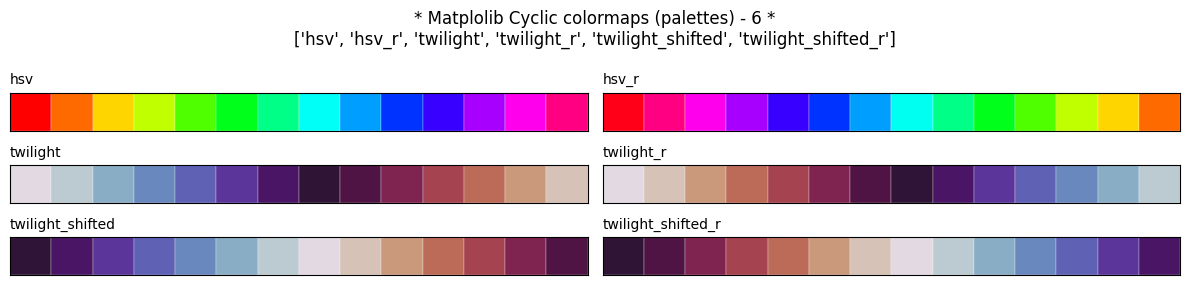

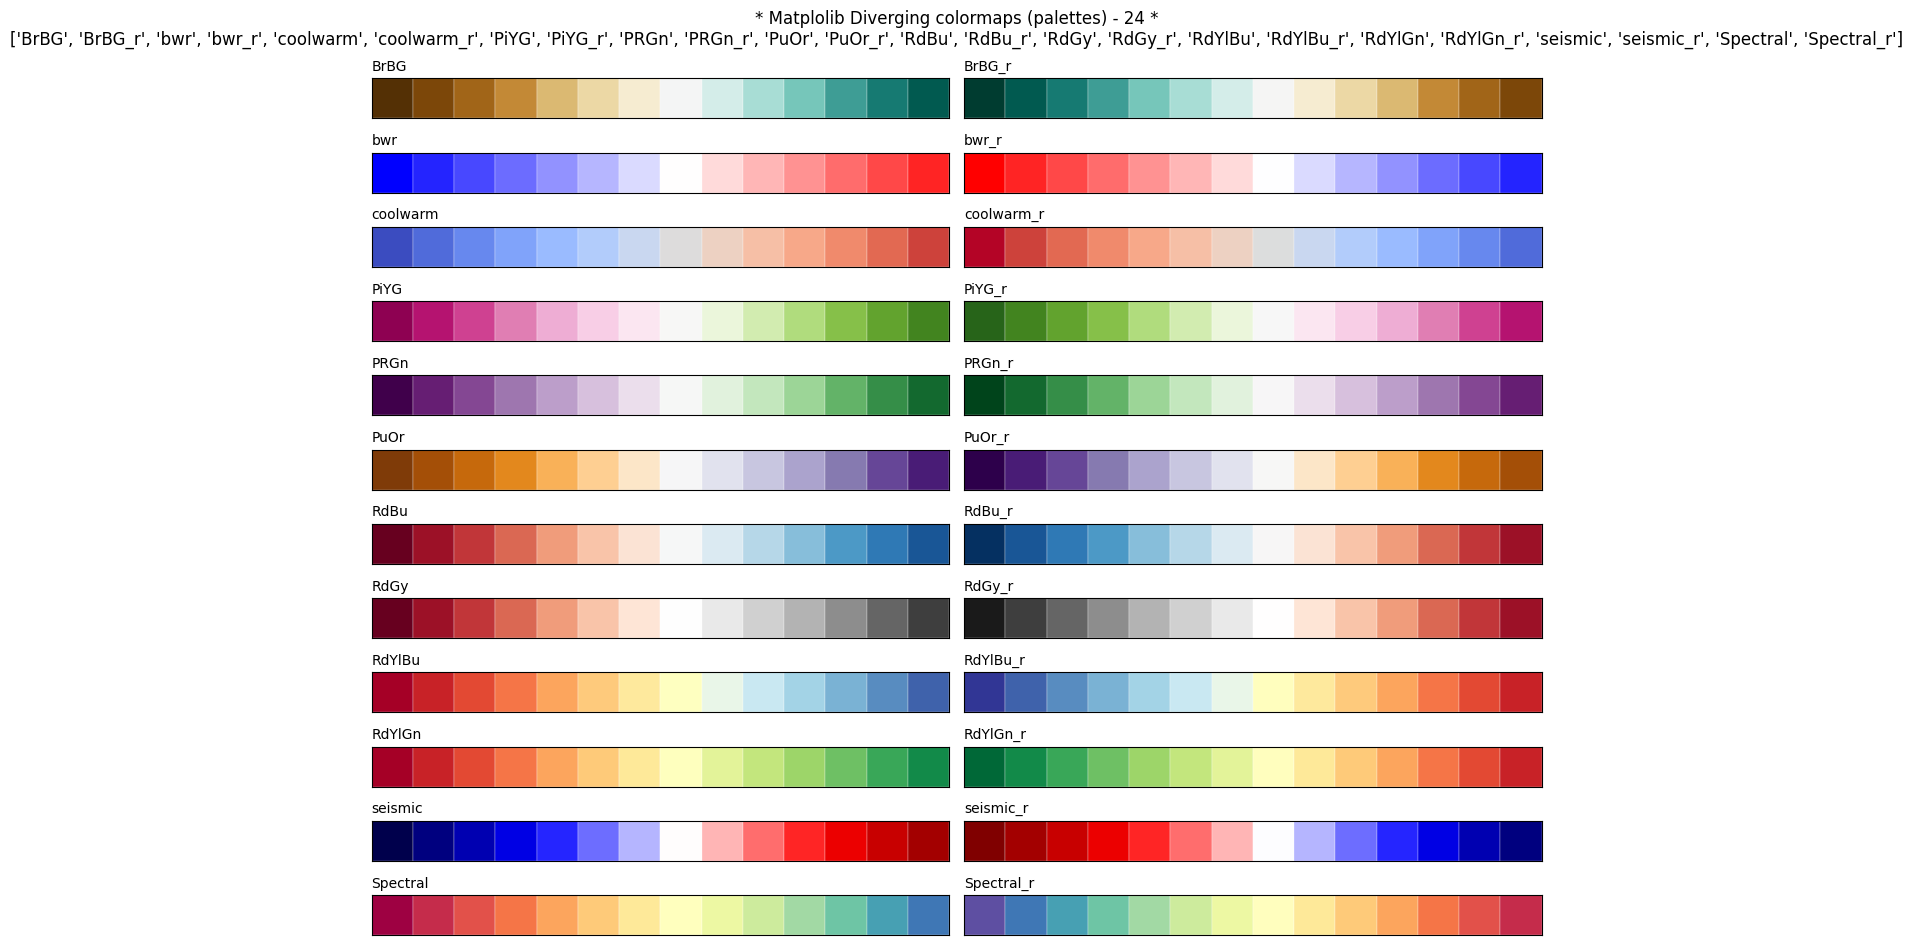

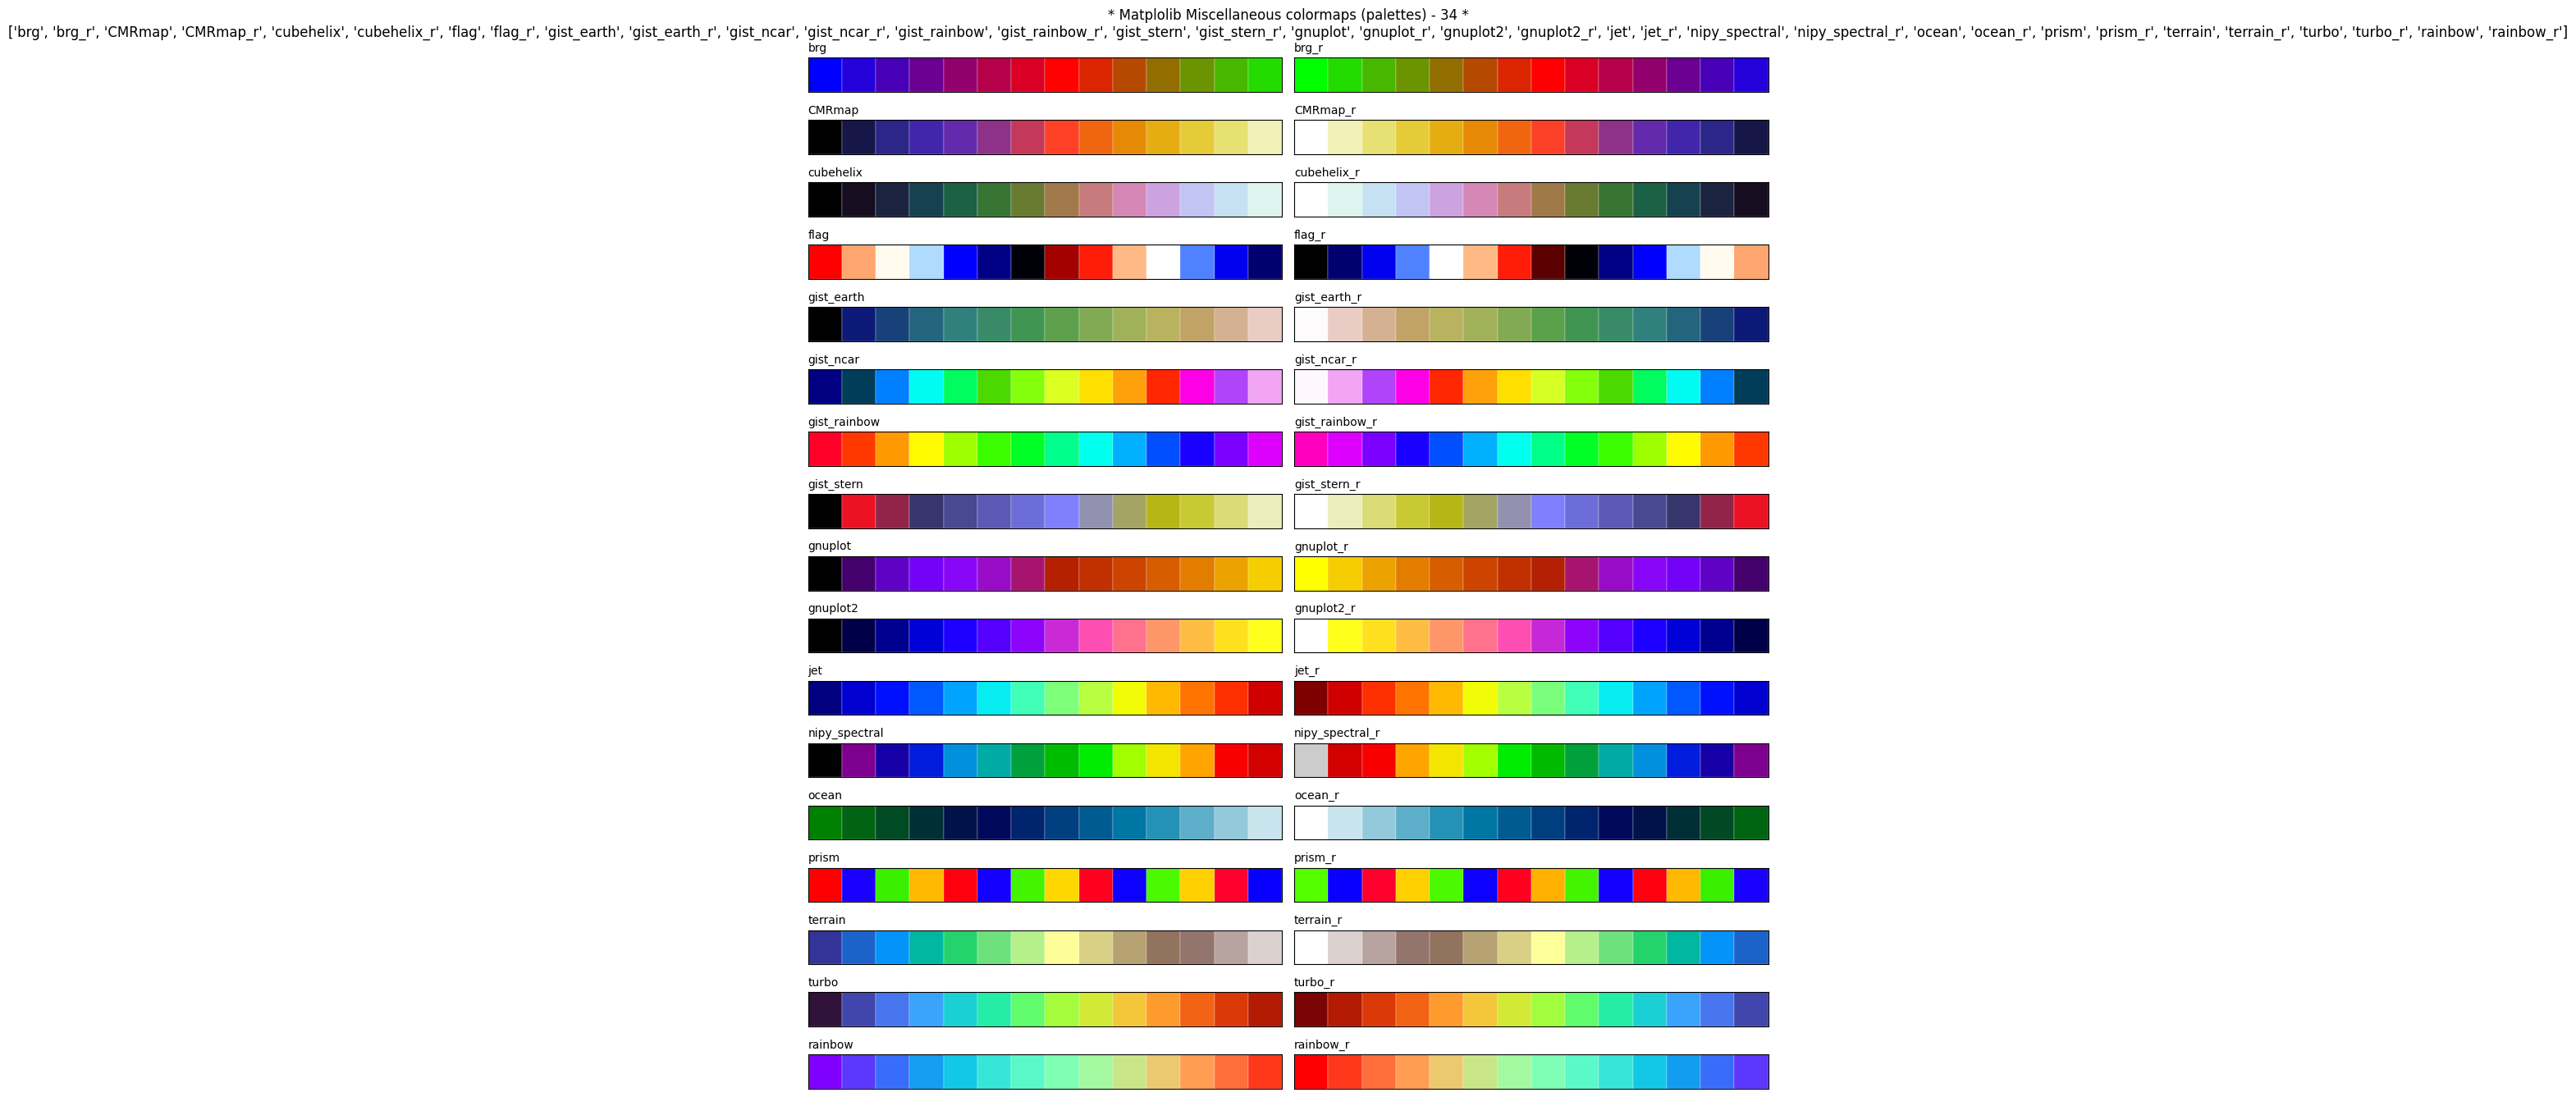

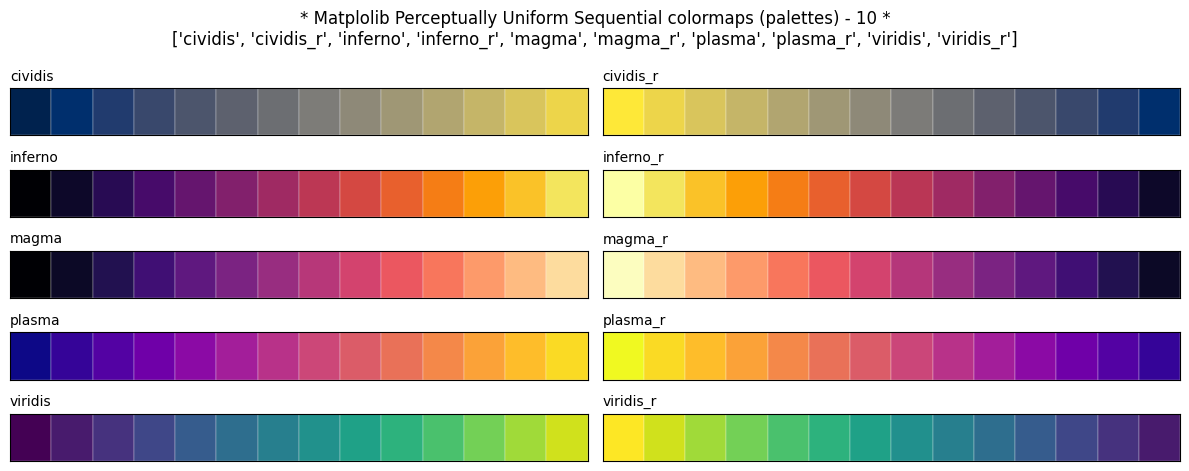

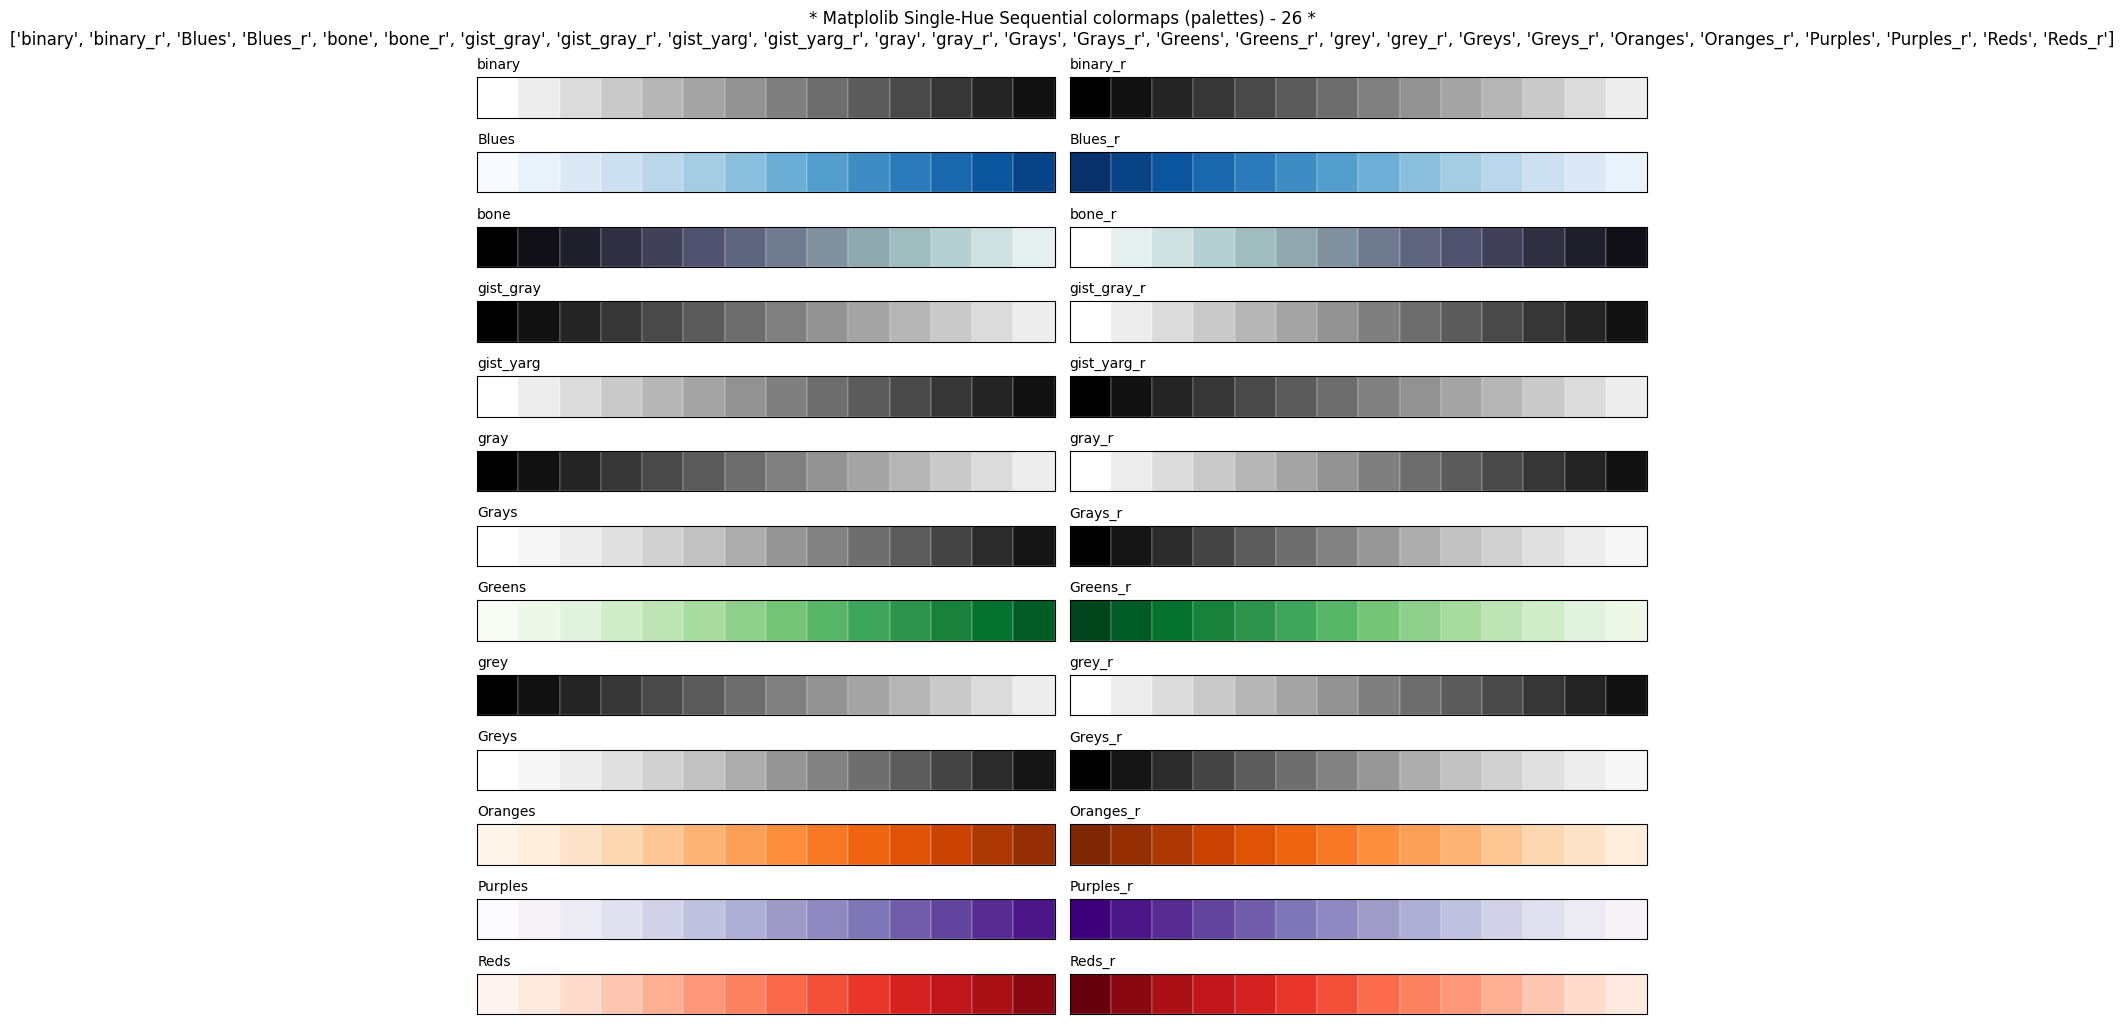

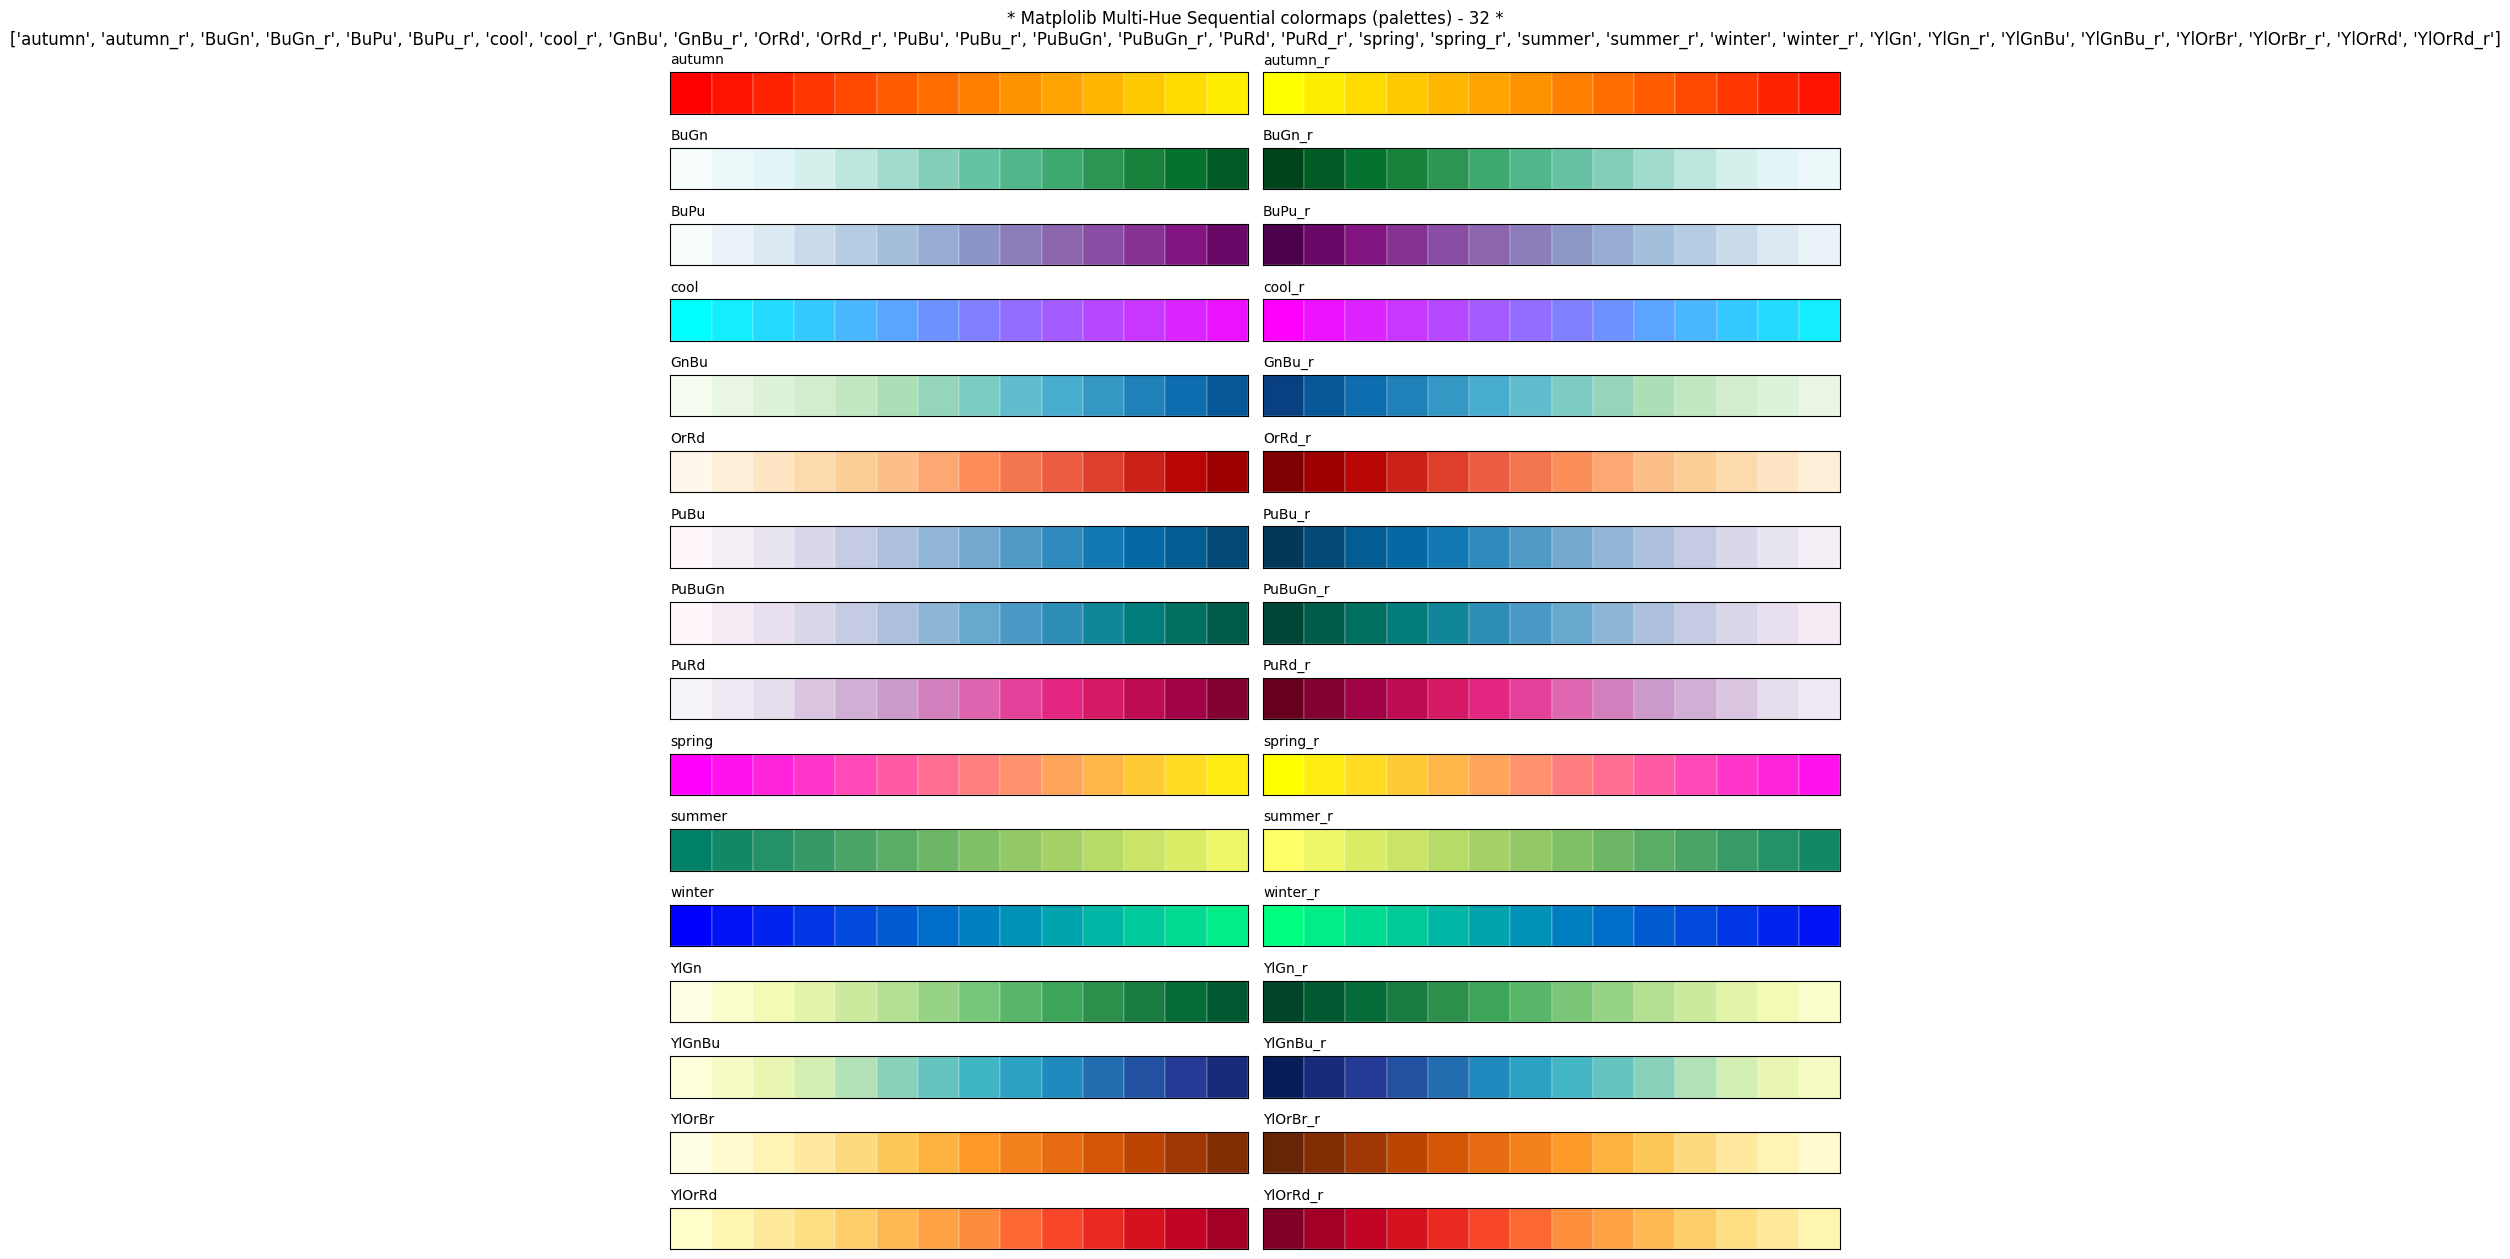

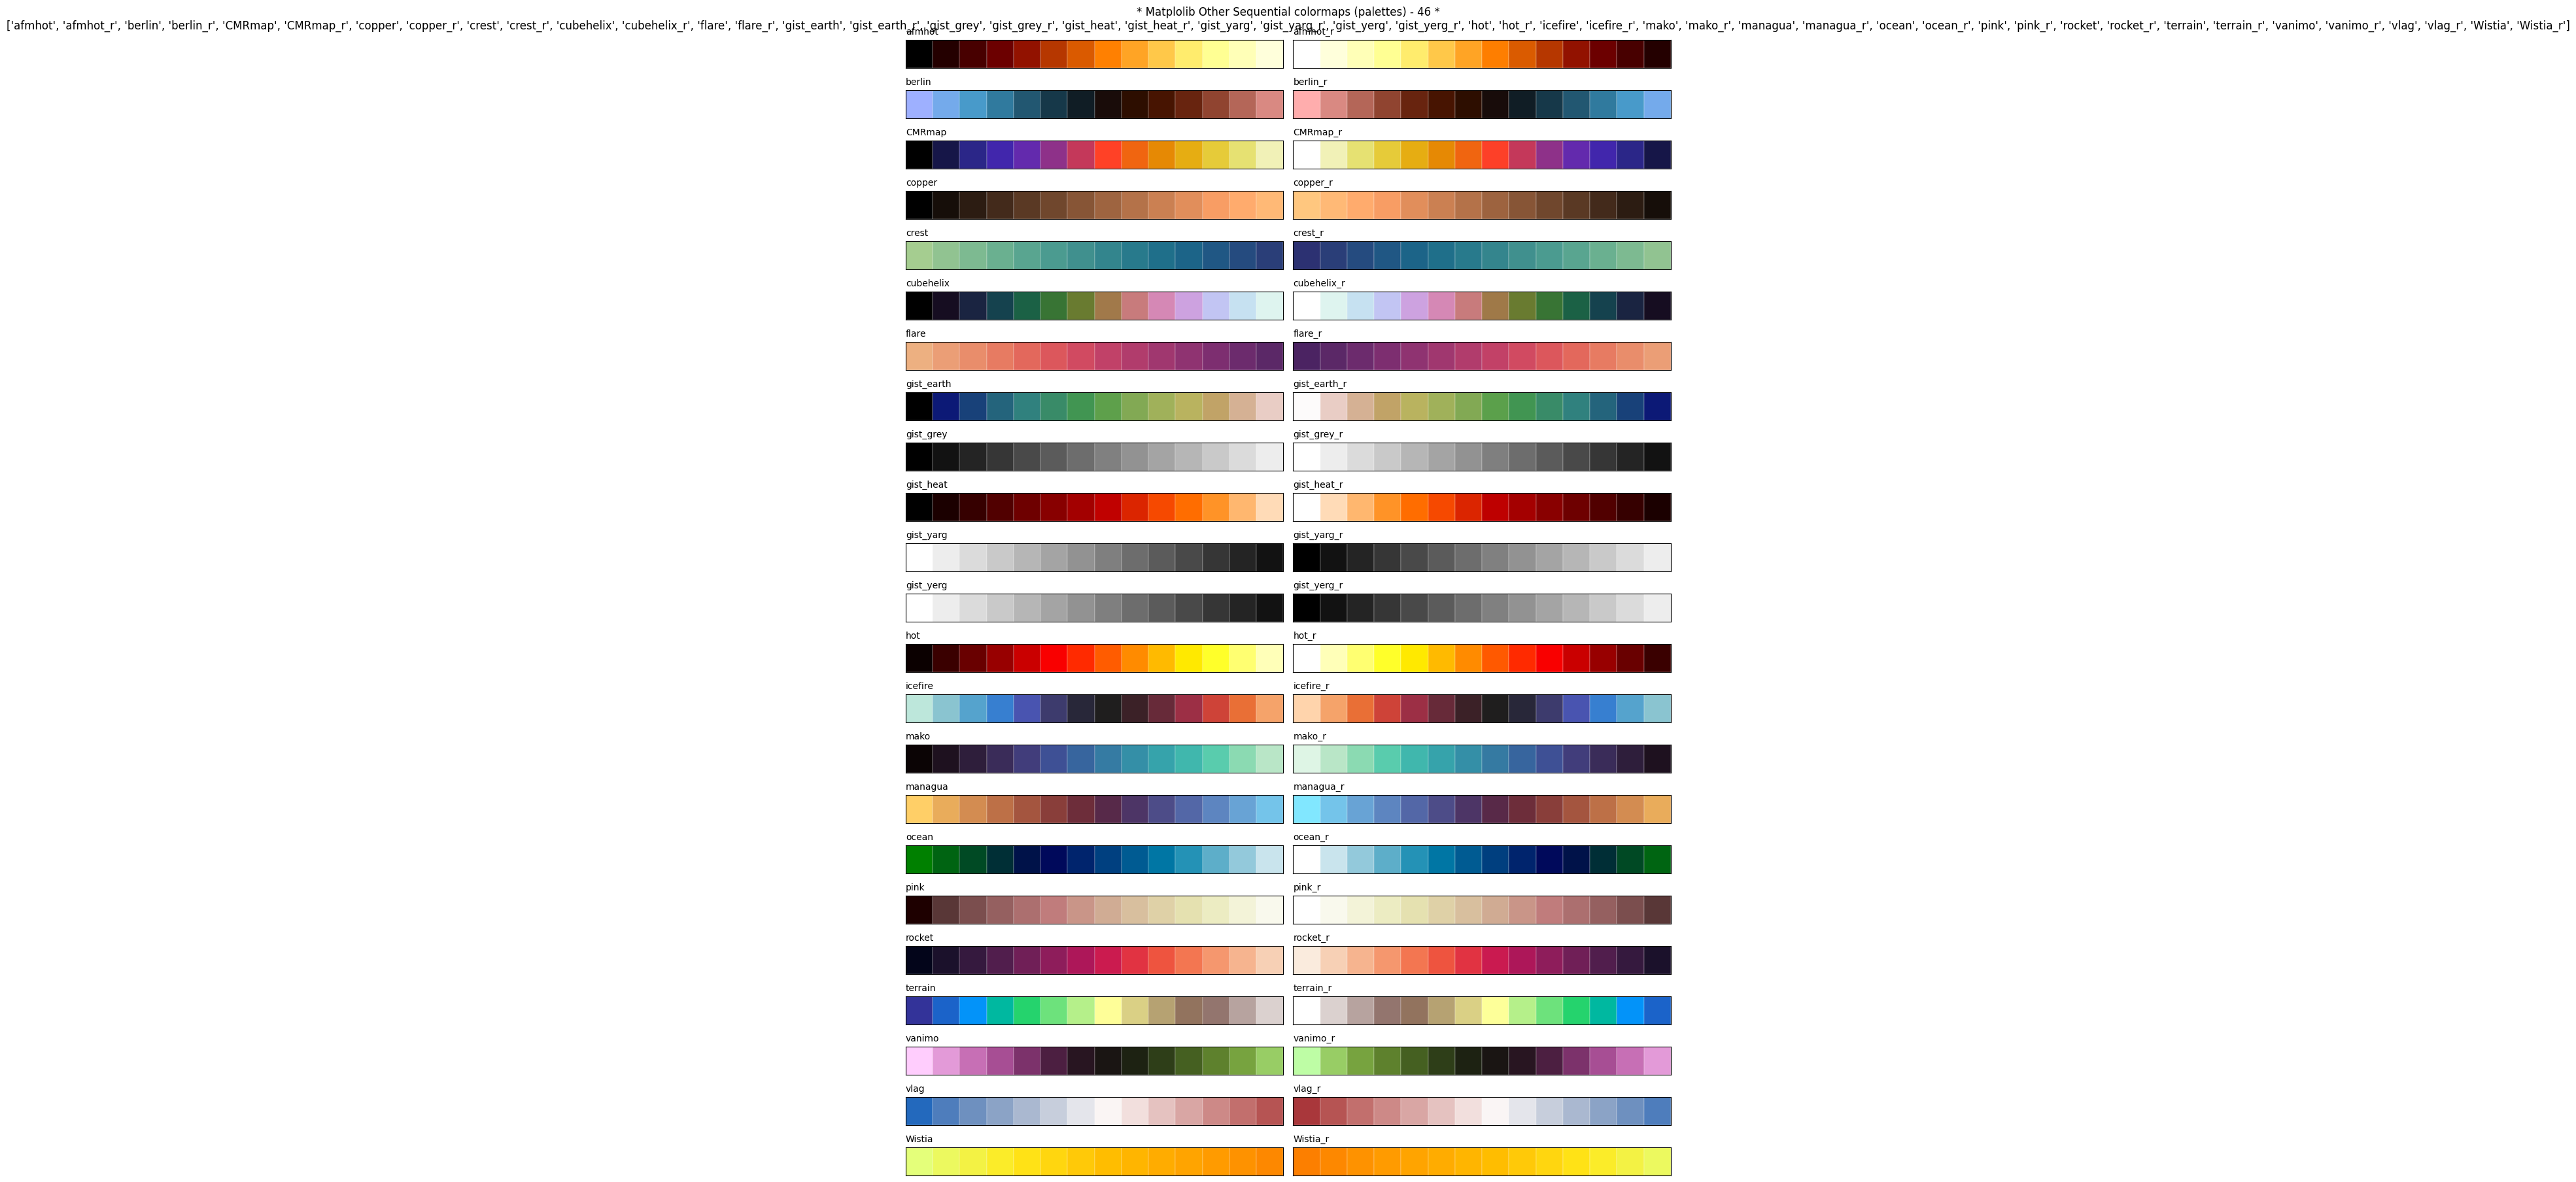

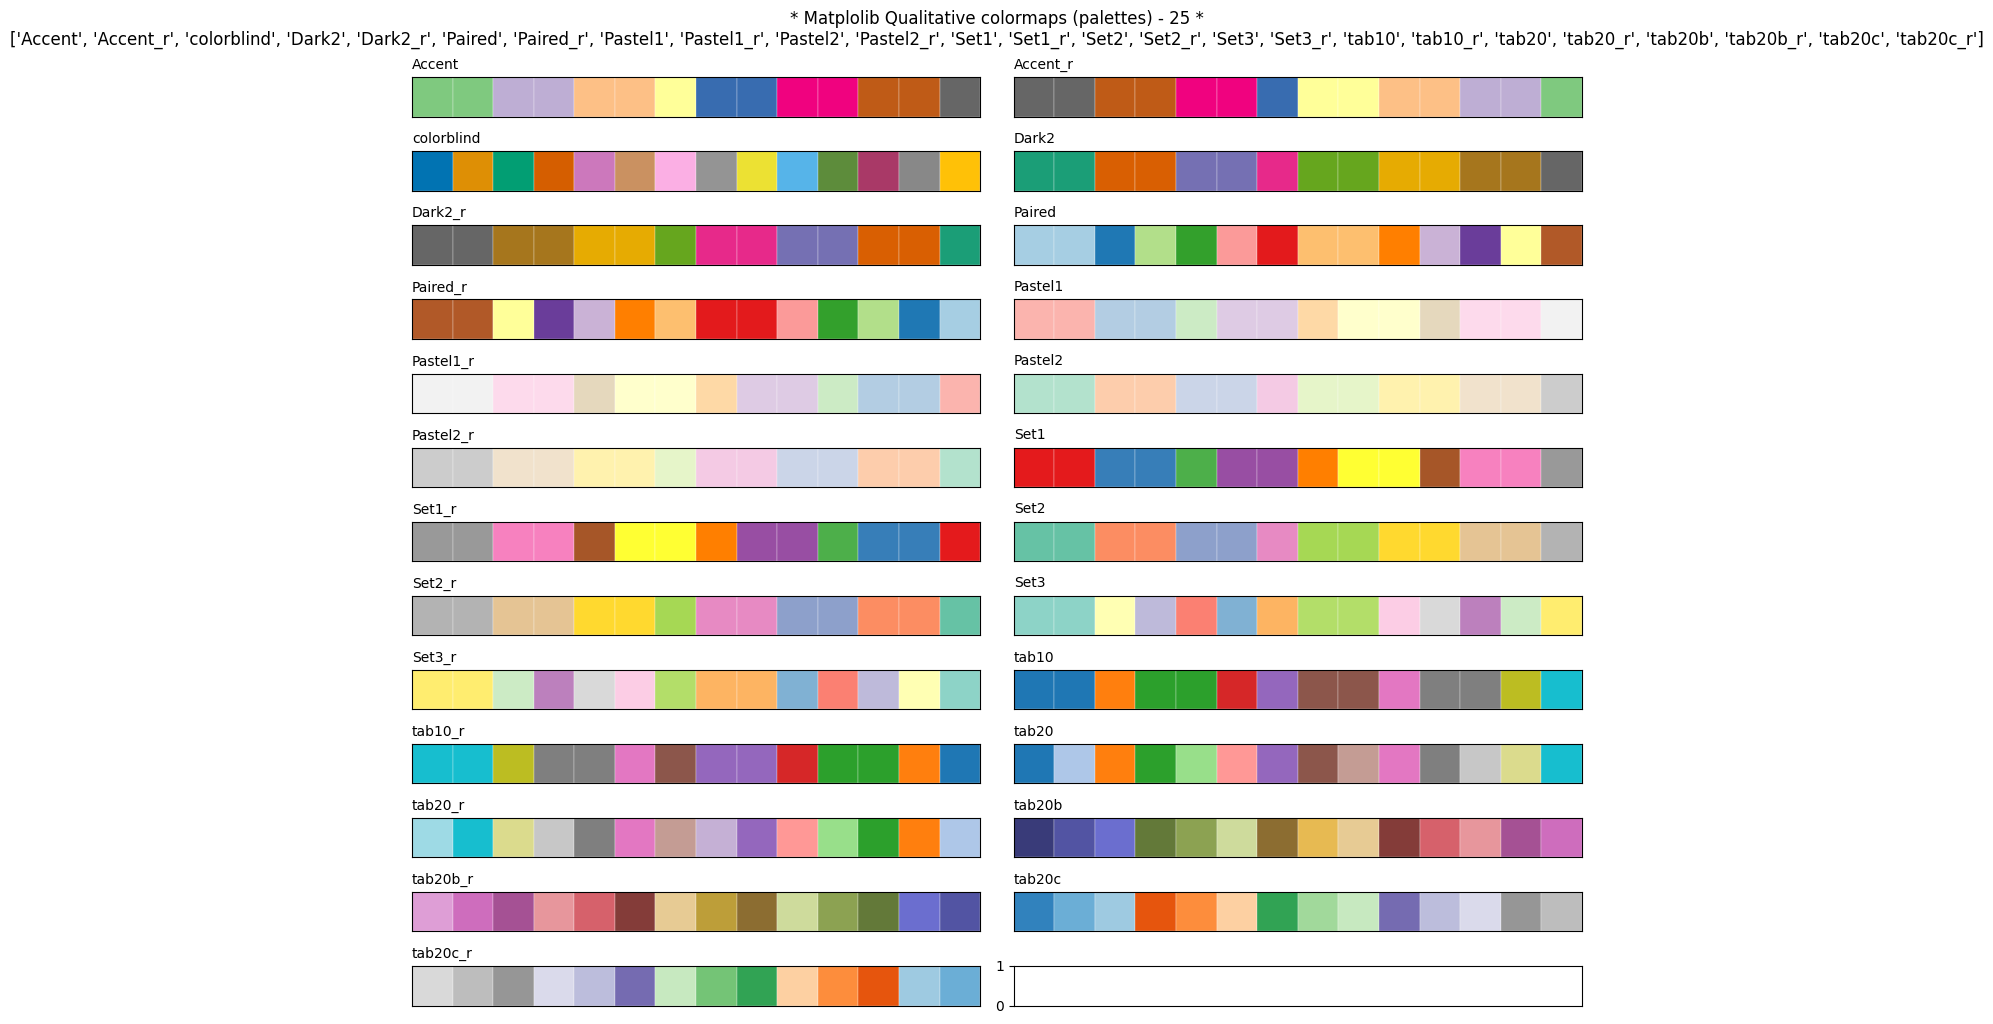

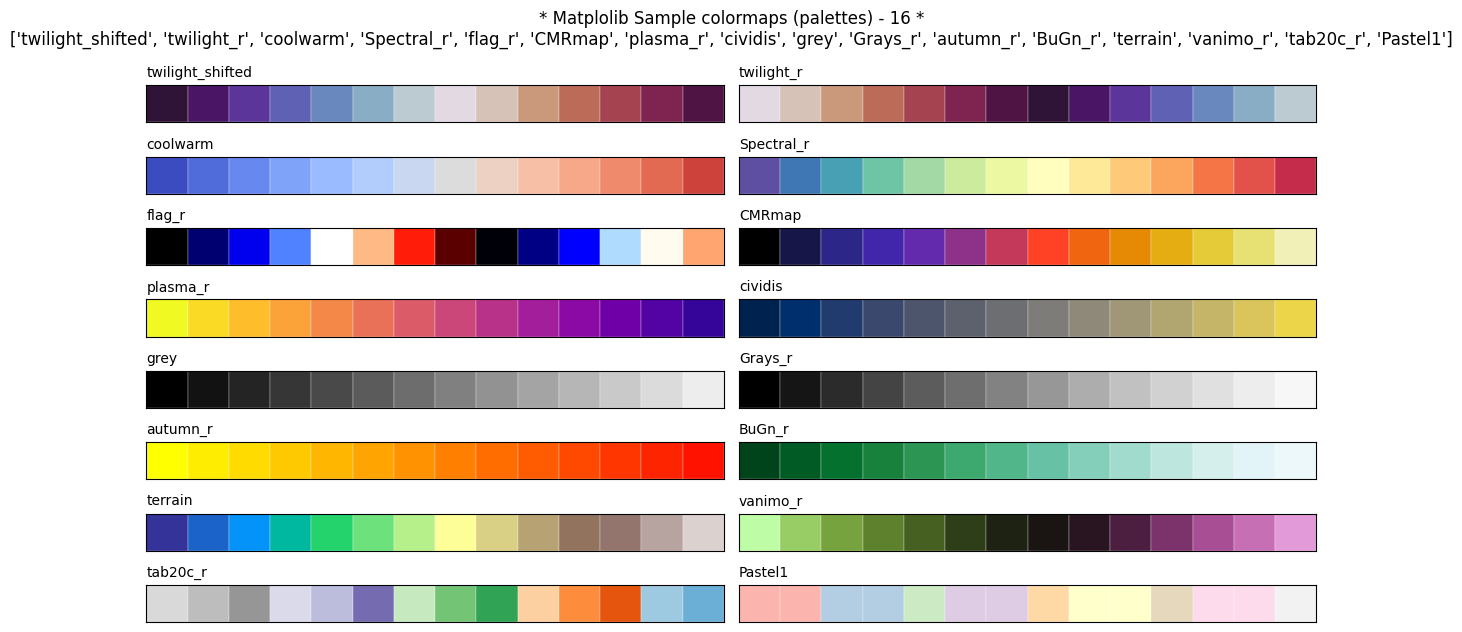

In [11]:
for pltt in ['Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Single-Hue Sequential',
             'Multi-Hue Sequential', 'Other Sequential', 'Qualitative', 'Sample']:
    fig = show_plt_palettes(pltt)

In [12]:
palettes_by_category_dic = get_matplotlib_palettes_dict()

list_of_pltt_lists = [value[0] for value in palettes_by_category_dic.values()]

d2 = {
    'Custom': ([], 'User selected palettes'),       # User Custom palette list born empty. It will take the value entered by the user if the user enters a list as palette_group parameter    
    'Sample': ([pltt for p_g in list_of_pltt_lists for pltt in random.sample(p_g, k=2)], 'A sample w/random two of each known category')    # Sample list w/random two of each known group
}

palettes_by_category_dic.update(d2)
palettes_by_category_dic.keys()

# "Perceptually Uniform Sequential".capitalize()
'Single-Hue Sequential'.title()


'Single-Hue Sequential'

In [13]:
# fig = show_plt_palettes(['PiYG', 'PRGn', 'BrBG', 'PuOr'])
# fig = show_plt_palettes('seq2')

In [14]:
l = [i + 1 for i in range(10)]
l[1:-1]

[2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
# Known matplotlib palette group lists - 'colorblind' in Qualitatives is jm addition
Qualitative = ['Accent', 'colorblind', 'Dark2', 'Dark2_r', 'flag', 'Paired', 'Pastel1', 'Pastel2',
                'prism', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

Sequential = ['autumn', 'binary', 'Blues', 'brg', 'BuPu', 'cividis', 'cool', 'GnBu',
            'Greens', 'Greys', 'Greys_r', 'gnuplot', 'inferno', 'magma', 'ocean', 'Oranges',
            'OrRd', 'plasma', 'PuRd', 'Purples', 'Reds', 'terrain', 'viridis', 'Wistia']

Diverging = ['BrBG', 'BrBG_r', 'bwr', 'bwr_r', 'coolwarm', 'PiYG', 'PiYG_r', 'PRGn',
                'PRGn_r', 'PuOr', 'PuOr_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdYlBu',
                'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'seismic', 'Spectral', 'Spectral_r']

Cyclic = ['berlin', 'berlin_r', 'cubehelix', 'cubehelix_r', 'flag_r', 'gist_rainbow', 'gist_rainbow_r', 'hsv',
            'hsv_r', 'jet', 'jet_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'rainbow',
            'rainbow_r', 'twilight', 'twilight_r','twilight_shifted', 'turbo', 'turbo_r', 'vanimo', 'vanimo_r']

Custom = []     # User Custom palette list born empty. It will take the value entered by the user if the user enters a list as palette_group parameter

Sample = [palette for p_g in [Qualitative, Sequential, Diverging, Cyclic] for palette in random.sample(p_g, k=6)]   # Sample list w/random four of each known group

# Palette group dict: p_g_key: (p_g_list, p_g_desc). To show the palette goup (and desc) based on 'palette_group' parameter
palette_group_dic = {
    'Qualitative': (Qualitative, 'for categorical data'),
    'Sequential': (Sequential, 'for data that has an order'),
    'Diverging': (Diverging, 'for data that have a significant midpoint'),
    'Cyclic': (Cyclic, 'for data that repeats, such as angles or phases'),
    'Custom': (Custom, 'user selected palettes'),
    'Sample': (Sample, 'a random sample of six of each category')
}

In [16]:
def show_dic0(dic):
    res = ''
    for k, v in dic.items():
        len_lst = len(v)
        res += f''' - {k} ({len_lst}):\n'''
        for i in range(len_lst):
            res += f'''   {i+1} {v[i]}\n'''
        res += '\n'
    return res

def show_dic(dic):
    res = ''
    for k, v in dic.items():
        res += f"\n# {k} - {v[1]}:\n    "
        for i, pltt in enumerate(v[0]):
            res += f"{pltt}, "
            if (i + 1) % 10 == 0:
                res += "\n    "
        res += "\n"
    
    print(res)

In [17]:
show_dic(palette_group_dic)


# Qualitative - for categorical data:
    Accent, colorblind, Dark2, Dark2_r, flag, Paired, Pastel1, Pastel2, prism, Set1, 
    Set2, Set3, tab10, tab20, tab20b, tab20c, 

# Sequential - for data that has an order:
    autumn, binary, Blues, brg, BuPu, cividis, cool, GnBu, Greens, Greys, 
    Greys_r, gnuplot, inferno, magma, ocean, Oranges, OrRd, plasma, PuRd, Purples, 
    Reds, terrain, viridis, Wistia, 

# Diverging - for data that have a significant midpoint:
    BrBG, BrBG_r, bwr, bwr_r, coolwarm, PiYG, PiYG_r, PRGn, PRGn_r, PuOr, 
    PuOr_r, RdBu, RdBu_r, RdGy, RdGy_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, seismic, 
    Spectral, Spectral_r, 

# Cyclic - for data that repeats, such as angles or phases:
    berlin, berlin_r, cubehelix, cubehelix_r, flag_r, gist_rainbow, gist_rainbow_r, hsv, hsv_r, jet, 
    jet_r, managua, managua_r, nipy_spectral, nipy_spectral_r, rainbow, rainbow_r, twilight, twilight_r, twilight_shifted, 
    turbo, turbo_r, vanimo, vanimo_r, 

# Custom - user

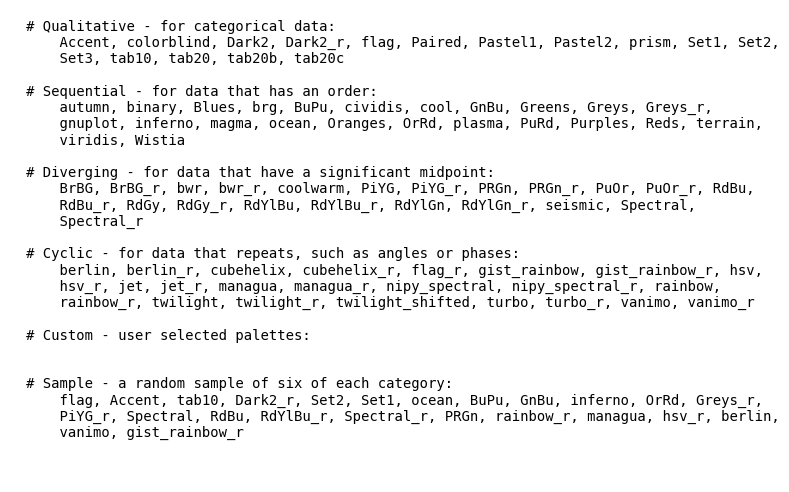

In [18]:
import matplotlib.pyplot as plt
import textwrap

def show_dic_as_figure(dic):
    """
    Muestra el contenido del diccionario de paletas en una figura matplotlib.
    """
    # Construimos el texto completo
    all_text = ""
    for group_name, (palette_list, description) in dic.items():
        all_text += f"# {group_name} - {description}:\n"
        wrapped = textwrap.fill(
            ", ".join(palette_list),
            width=90,
            initial_indent="    ",
            subsequent_indent="    "
        )
        all_text += wrapped + "\n\n"

    # Crear la figura
    fig, ax = plt.subplots(figsize=(8, len(all_text.splitlines()) * 0.2), tight_layout=True)
    ax.axis("off")  # Oculta ejes
    ax.text(
        0.025, 0.5, all_text,
        # transform=ax.transAxes,
        fontsize=10,
        va="center", ha="left",
        family="monospace"
    )

    plt.show()

fig = show_dic_as_figure(palette_group_dic)

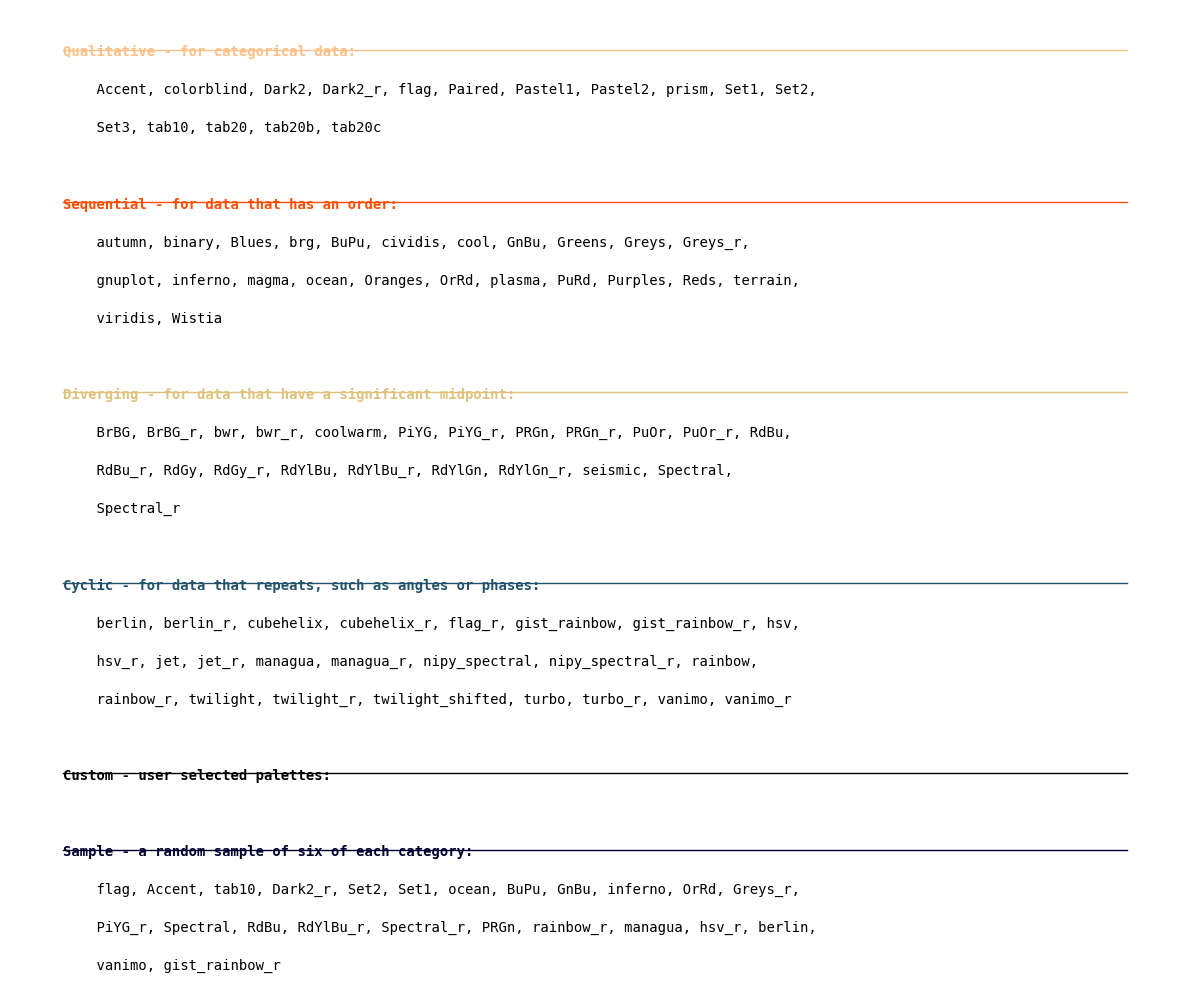

In [19]:
import matplotlib.pyplot as plt
import textwrap

def show_dic_as_figure_colored(dic, sample_color_index=3):
    """
    Muestra el contenido del diccionario de paletas en una figura matplotlib
    con nombres de grupo coloreados y subrayados.
    """
    # Definir colores característicos para cada grupo
    group_colors = {}
    for group_name, (palette_list, _) in dic.items():
        if palette_list:  # si hay paletas, tomamos un color de ejemplo
            cmap = plt.get_cmap(palette_list[0])
            group_colors[group_name] = cmap(sample_color_index / 10)  # color del medio
        else:
            group_colors[group_name] = "black"  # por si está vacío

    # Preparar líneas de texto
    all_lines = []
    for group_name, (palette_list, description) in dic.items():
        # Título
        title_text = f"{group_name} - {description}:"
        wrapped_list = textwrap.fill(
            ", ".join(palette_list),
            width=90,
            initial_indent="    ",
            subsequent_indent="    "
        )
        all_lines.append((title_text, group_colors[group_name], True))  # True = subrayado
        for line in wrapped_list.splitlines():
            all_lines.append((line, "black", False))
        all_lines.append(("", "black", False))  # línea en blanco

    # Crear figura
    fig, ax = plt.subplots(figsize=(12, len(all_lines) * 0.35))
    ax.axis("off")

    # Dibujar texto y subrayados
    y = 1.0
    line_height = 1 / len(all_lines)
    for text, color, underline in all_lines:
        ax.text(
            0, y, text,
            fontsize=10,
            va="top", ha="left",
            color=color,
            family="monospace",
            fontweight="bold" if underline else "normal"
        )
        # Subrayado con línea horizontal
        if underline and text:
            ax.plot([0, 0.9], [y - 0.005, y - 0.005], color=color, linewidth=1)
        y -= line_height

    plt.tight_layout()
    plt.show()


fig = show_dic_as_figure_colored(palette_group_dic)


In [20]:
import textwrap  # Standard library

def show_dic(dic):
    for group_name, (palette_list, description) in dic.items():
        print(f"\n# {group_name} - {description}:")
        formatted = textwrap.fill(
            ", ".join(palette_list),
            width=90,                 # ancho máximo de línea
            initial_indent="    ",    # sangría de la primera línea
            subsequent_indent="    "  # sangría de las líneas siguientes
        )
        print(formatted)

show_dic(palette_group_dic)


# Qualitative - for categorical data:
    Accent, colorblind, Dark2, Dark2_r, flag, Paired, Pastel1, Pastel2, prism, Set1, Set2,
    Set3, tab10, tab20, tab20b, tab20c

# Sequential - for data that has an order:
    autumn, binary, Blues, brg, BuPu, cividis, cool, GnBu, Greens, Greys, Greys_r,
    gnuplot, inferno, magma, ocean, Oranges, OrRd, plasma, PuRd, Purples, Reds, terrain,
    viridis, Wistia

# Diverging - for data that have a significant midpoint:
    BrBG, BrBG_r, bwr, bwr_r, coolwarm, PiYG, PiYG_r, PRGn, PRGn_r, PuOr, PuOr_r, RdBu,
    RdBu_r, RdGy, RdGy_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, seismic, Spectral,
    Spectral_r

# Cyclic - for data that repeats, such as angles or phases:
    berlin, berlin_r, cubehelix, cubehelix_r, flag_r, gist_rainbow, gist_rainbow_r, hsv,
    hsv_r, jet, jet_r, managua, managua_r, nipy_spectral, nipy_spectral_r, rainbow,
    rainbow_r, twilight, twilight_r, twilight_shifted, turbo, turbo_r, vanimo, vanimo_r

# Custom - user selected palet

In [21]:
import textwrap

def show_dic(dic):
    for k, v in dic.items():
        print(f"\n# {k} - {v[1]}:")
        print(textwrap.fill(", ".join(v[0]), width=90, subsequent_indent="    "))

show_dic(palette_group_dic)



# Qualitative - for categorical data:
Accent, colorblind, Dark2, Dark2_r, flag, Paired, Pastel1, Pastel2, prism, Set1, Set2,
    Set3, tab10, tab20, tab20b, tab20c

# Sequential - for data that has an order:
autumn, binary, Blues, brg, BuPu, cividis, cool, GnBu, Greens, Greys, Greys_r, gnuplot,
    inferno, magma, ocean, Oranges, OrRd, plasma, PuRd, Purples, Reds, terrain, viridis,
    Wistia

# Diverging - for data that have a significant midpoint:
BrBG, BrBG_r, bwr, bwr_r, coolwarm, PiYG, PiYG_r, PRGn, PRGn_r, PuOr, PuOr_r, RdBu,
    RdBu_r, RdGy, RdGy_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, seismic, Spectral,
    Spectral_r

# Cyclic - for data that repeats, such as angles or phases:
berlin, berlin_r, cubehelix, cubehelix_r, flag_r, gist_rainbow, gist_rainbow_r, hsv,
    hsv_r, jet, jet_r, managua, managua_r, nipy_spectral, nipy_spectral_r, rainbow,
    rainbow_r, twilight, twilight_r, twilight_shifted, turbo, turbo_r, vanimo, vanimo_r

# Custom - user selected palettes:


# Sample 

In [22]:
def show_dic(dic, n_colors=8):
    """
    Muestra los grupos de paletas con descripción y 
    una franja de colores por cada paleta.
    """
    for group_name, (palette_list, description) in dic.items():
        print(f"\n# {group_name} - {description}:")

        for palette_name in palette_list:
            try:
                # Obtener colores de la paleta
                cmap = plt.get_cmap(palette_name)
                colors = cmap(range(n_colors))

                # Crear franja visual
                fig, ax = plt.subplots(figsize=(n_colors, 0.5))
                ax.imshow([colors], aspect='auto')
                ax.set_axis_off()
                ax.set_title(palette_name, fontsize=8, pad=2)
                plt.show()

            except ValueError:
                # Paleta no encontrada en Matplotlib
                print(f"  [!] '{palette_name}' no es una paleta reconocida por matplotlib.")


# show_dic(palette_group_dic)

In [23]:
res = ''
for i in range(26):
    res += f"{i} "
    if i % 8 == 0 and i != 0:
        res += "\n"
print(res)

0 1 2 3 4 5 6 7 8 
9 10 11 12 13 14 15 16 
17 18 19 20 21 22 23 24 
25 
